<h3 style="color:red">  H-1B Non-Immigrant Labour Visa : Investigating Impact on Job Market, Salary, & Approval Rate 2011-2018 </h3>
Website: https://www.kaggle.com/datasets/thedevastator/h-1b-non-immigrant-labour-visa

### Import Libraries ###

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read the Dataset File ###

In [2]:
df = pd.read_csv("h1b_data.csv.zip")
df.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3080\100379593.py:1: DtypeWarning: Columns (8,12,15,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("h1b_data.csv.zip")


case_year case_status case_submitted decision_date  \
0       2017           C     2017-02-06    2017-02-10   
1       2017           C     2017-03-21    2017-03-27   
2       2017           C     2017-03-17    2017-03-23   
3       2017           C     2017-03-10    2017-03-16   
4       2017           C     2017-08-04    2017-08-10   

                          emp_name     emp_city emp_state emp_zip emp_country  \
0         LAKELANDS NEPHROLOGY, PA    GREENWOOD        SC   29646         USA   
1              UNIVERSITY OF IDAHO       MOSCOW        ID   83844         USA   
2           XPO SUPPLY CHAIN, INC.   HIGH POINT        NC   27265         USA   
3  C AND S WHOLESALE GROCERS, INC.        KEENE        NH   03431         USA   
4                   SANFORD CLINIC  SIOUX FALLS        SD   57117         NaN   

                 job_title  ...  pw_level  wage_from wage_to  wage_unit  \
0             NEPHROLOGIST  ...       NaN  190000.00     0.0          Y   
1     POST DOCTORAL FELLOW  ...   Level I   47507.00     0.0          Y   
2        OPERATION ANALYST  ...   Level I   65000.00     0.0          Y   
3  SR. INDUSTRIAL ENGINEER  ...  Level II   86988.15     0.0          Y   
4  HEMATOLOGIST/ONCOLOGIST  ...       NaN  450000.00     0.0          Y   

   work_city work_state  emp_h1b_dependent  emp_willful_violator        lat  \
0  ABBEVILLE         SC                  N                     N  34.178172   
1   ABERDEEN         ID                  N                     N  42.944078   
2   ABERDEEN         MD                  N                     N  39.509556   
3   ABERDEEN         MD                  N                     N  39.509556   
4   ABERDEEN         SD                  N                     N  45.464698   

          lng  
0  -82.379015  
1 -112.838326  
2  -76.164120  
3  -76.164120  
4  -98.486483  

[5 rows x 25 columns]

### Managing Missing Values or Columns (either by handling its or by dropping its) ###

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360810 entries, 0 to 3360809
Data columns (total 25 columns):
 #   Column                Dtype  
---  ------                -----  
 0   case_year             int64  
 1   case_status           object 
 2   case_submitted        object 
 3   decision_date         object 
 4   emp_name              object 
 5   emp_city              object 
 6   emp_state             object 
 7   emp_zip               object 
 8   emp_country           object 
 9   job_title             object 
 10  soc_code              object 
 11  soc_name              object 
 12  full_time_position    object 
 13  prevailing_wage       float64
 14  pw_unit               object 
 15  pw_level              object 
 16  wage_from             float64
 17  wage_to               float64
 18  wage_unit             object 
 19  work_city             object 
 20  work_state            object 
 21  emp_h1b_dependent     object 
 22  emp_willful_violator  object 
 23  lat    

In [4]:
df.isnull().sum() # returns the number of missing values in the dataset

case_year                     0
case_status                  15
case_submitted                0
decision_date                 0
emp_name                     81
emp_city                     58
emp_state                   123
emp_zip                      90
emp_country             1692680
job_title                    24
soc_code                    157
soc_name                  16538
full_time_position       602270
prevailing_wage             178
pw_unit                     221
pw_level                2346302
wage_from                    14
wage_to                 1723986
wage_unit                    61
work_city                     0
work_state                    0
emp_h1b_dependent       1604213
emp_willful_violator    1604212
lat                           0
lng                           0
dtype: int64

In [5]:
df.isnull().sum().sum()

9591223

In [6]:
df.drop(['emp_country','soc_name','full_time_position','pw_level','wage_to','emp_h1b_dependent','emp_willful_violator'],axis=1,inplace=True) #drop all missing columns which are includes high missing values  

In [7]:
df.isnull().sum().sum()

1022

In [8]:
df.head()

case_year case_status case_submitted decision_date  \
0       2017           C     2017-02-06    2017-02-10   
1       2017           C     2017-03-21    2017-03-27   
2       2017           C     2017-03-17    2017-03-23   
3       2017           C     2017-03-10    2017-03-16   
4       2017           C     2017-08-04    2017-08-10   

                          emp_name     emp_city emp_state emp_zip  \
0         LAKELANDS NEPHROLOGY, PA    GREENWOOD        SC   29646   
1              UNIVERSITY OF IDAHO       MOSCOW        ID   83844   
2           XPO SUPPLY CHAIN, INC.   HIGH POINT        NC   27265   
3  C AND S WHOLESALE GROCERS, INC.        KEENE        NH   03431   
4                   SANFORD CLINIC  SIOUX FALLS        SD   57117   

                 job_title soc_code  prevailing_wage pw_unit  wage_from  \
0             NEPHROLOGIST  29-1063         187200.0       Y  190000.00   
1     POST DOCTORAL FELLOW  19-1013          39957.0       Y   47507.00   
2        OPERATION ANALYST  15-2031          59966.0       Y   65000.00   
3  SR. INDUSTRIAL ENGINEER  17-2112          78832.0       Y   86988.15   
4  HEMATOLOGIST/ONCOLOGIST  29-1069         169645.0       Y  450000.00   

  wage_unit  work_city work_state        lat         lng  
0         Y  ABBEVILLE         SC  34.178172  -82.379015  
1         Y   ABERDEEN         ID  42.944078 -112.838326  
2         Y   ABERDEEN         MD  39.509556  -76.164120  
3         Y   ABERDEEN         MD  39.509556  -76.164120  
4         Y   ABERDEEN         SD  45.464698  -98.486483

In [9]:
df.isnull().sum()

case_year            0
case_status         15
case_submitted       0
decision_date        0
emp_name            81
emp_city            58
emp_state          123
emp_zip             90
job_title           24
soc_code           157
prevailing_wage    178
pw_unit            221
wage_from           14
wage_unit           61
work_city            0
work_state           0
lat                  0
lng                  0
dtype: int64

In [10]:
df.dropna(subset=['case_status','emp_name','emp_city','emp_state','emp_zip','job_title','soc_code','prevailing_wage','pw_unit','wage_from','wage_unit'],inplace = True) #deals with missing values in each column by deleting missing values 

In [11]:
df.isnull().sum() # now we don't have any missing columns!!!

case_year          0
case_status        0
case_submitted     0
decision_date      0
emp_name           0
emp_city           0
emp_state          0
emp_zip            0
job_title          0
soc_code           0
prevailing_wage    0
pw_unit            0
wage_from          0
wage_unit          0
work_city          0
work_state         0
lat                0
lng                0
dtype: int64

In [12]:
df.isnull().sum().sum()

0

### Handling Datetime ###

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3360030 entries, 0 to 3360809
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   case_year        int64  
 1   case_status      object 
 2   case_submitted   object 
 3   decision_date    object 
 4   emp_name         object 
 5   emp_city         object 
 6   emp_state        object 
 7   emp_zip          object 
 8   job_title        object 
 9   soc_code         object 
 10  prevailing_wage  float64
 11  pw_unit          object 
 12  wage_from        float64
 13  wage_unit        object 
 14  work_city        object 
 15  work_state       object 
 16  lat              float64
 17  lng              float64
dtypes: float64(4), int64(1), object(13)
memory usage: 487.1+ MB


In [14]:
df['case_submitted'] = pd.to_datetime(df['case_submitted'],dayfirst=True)

In [15]:
df['decision_date'] = pd.to_datetime(df['decision_date'],dayfirst=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3360030 entries, 0 to 3360809
Data columns (total 18 columns):
 #   Column           Dtype         
---  ------           -----         
 0   case_year        int64         
 1   case_status      object        
 2   case_submitted   datetime64[ns]
 3   decision_date    datetime64[ns]
 4   emp_name         object        
 5   emp_city         object        
 6   emp_state        object        
 7   emp_zip          object        
 8   job_title        object        
 9   soc_code         object        
 10  prevailing_wage  float64       
 11  pw_unit          object        
 12  wage_from        float64       
 13  wage_unit        object        
 14  work_city        object        
 15  work_state       object        
 16  lat              float64       
 17  lng              float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(11)
memory usage: 487.1+ MB


In [17]:
df.head()

case_year case_status case_submitted decision_date  \
0       2017           C     2017-02-06    2017-02-10   
1       2017           C     2017-03-21    2017-03-27   
2       2017           C     2017-03-17    2017-03-23   
3       2017           C     2017-03-10    2017-03-16   
4       2017           C     2017-08-04    2017-08-10   

                          emp_name     emp_city emp_state emp_zip  \
0         LAKELANDS NEPHROLOGY, PA    GREENWOOD        SC   29646   
1              UNIVERSITY OF IDAHO       MOSCOW        ID   83844   
2           XPO SUPPLY CHAIN, INC.   HIGH POINT        NC   27265   
3  C AND S WHOLESALE GROCERS, INC.        KEENE        NH   03431   
4                   SANFORD CLINIC  SIOUX FALLS        SD   57117   

                 job_title soc_code  prevailing_wage pw_unit  wage_from  \
0             NEPHROLOGIST  29-1063         187200.0       Y  190000.00   
1     POST DOCTORAL FELLOW  19-1013          39957.0       Y   47507.00   
2        OPERATION ANALYST  15-2031          59966.0       Y   65000.00   
3  SR. INDUSTRIAL ENGINEER  17-2112          78832.0       Y   86988.15   
4  HEMATOLOGIST/ONCOLOGIST  29-1069         169645.0       Y  450000.00   

  wage_unit  work_city work_state        lat         lng  
0         Y  ABBEVILLE         SC  34.178172  -82.379015  
1         Y   ABERDEEN         ID  42.944078 -112.838326  
2         Y   ABERDEEN         MD  39.509556  -76.164120  
3         Y   ABERDEEN         MD  39.509556  -76.164120  
4         Y   ABERDEEN         SD  45.464698  -98.486483

### Analyse Each Coulmns Unique Values ###

In [18]:
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:  3360030
Columns:  18


In [19]:
columns = df.columns
for column in columns:
    print(f"{column} : {df[column].nunique()}")

case_year : 7
case_status : 4
case_submitted : 2945
decision_date : 2446
emp_name : 236638
emp_city : 8984
emp_state : 57
emp_zip : 22315
job_title : 311390
soc_code : 1887
prevailing_wage : 62575
pw_unit : 5
wage_from : 144415
wage_unit : 5
work_city : 7666
work_state : 53
lat : 10959
lng : 10963


In [20]:
df['case_year'].unique().tolist() # cases from 2011 to 2018

[2017, 2016, 2015, 2014, 2013, 2012, 2011]

In [21]:
df['case_status'].unique().tolist() # C= certified, CW= certified withdrawn D= denied W= withdrawn

['C', 'CW', 'D', 'W']

In [22]:
df['case_submitted'].unique() # date of case submittion

array(['2017-02-06T00:00:00.000000000', '2017-03-21T00:00:00.000000000',
       '2017-03-17T00:00:00.000000000', ...,
       '2011-01-01T00:00:00.000000000', '2010-12-25T00:00:00.000000000',
       '2010-11-20T00:00:00.000000000'], dtype='datetime64[ns]')

In [23]:
df['decision_date'].unique() # date of case decision has been taken

array(['2017-02-10T00:00:00.000000000', '2017-03-27T00:00:00.000000000',
       '2017-03-23T00:00:00.000000000', ...,
       '2011-01-09T00:00:00.000000000', '2011-07-02T00:00:00.000000000',
       '2010-12-11T00:00:00.000000000'], dtype='datetime64[ns]')

In [24]:
df['emp_name'].unique().tolist() # companies that require H-1B labour "employer"

['LAKELANDS NEPHROLOGY, PA',
 'UNIVERSITY OF IDAHO',
 'XPO SUPPLY CHAIN, INC.',
 'C AND S WHOLESALE GROCERS, INC.',
 'SANFORD CLINIC',
 'NORTHERN STATE UNIVERSITY',
 "AVERA ST. LUKE'S HOSPITAL",
 'SAFEWAY INC.',
 'HEALTH CAROUSEL, LLC',
 'GRAYS HARBOR COLLEGE',
 'TEXAS TECH UNIVERSITY HEALTH SCIENCES CENTER',
 'MANAGEMENT HEALTH SYSTEMS, INC.',
 'OPHTHALMOLOGY SPECIALISTS OF TEXAS PLLC',
 'HARDIN - SIMMONS UNIVERSITY',
 'MCMURRY UNIVERSITY',
 'HEALTHSOUTH REHABILITATION HOSPITAL OF ABILENE, LLC',
 'HENDRICK MEDICAL CENTER',
 'MCR INVESTMENT CORPORATION',
 'THE UNIVERSITY OF IOWA',
 'SNOWMASS ENERGY PARTNERS, LTD.',
 'ANJANEYAP, INC.',
 'KS2 TX, PC',
 'CVS RX SERVICES, INC.',
 'ABILENE CHRISTIAN UNIVERSITY',
 'FAMILIA DEVELOPMENT LLC',
 'JACKSON THERAPY PARTNERS HOLDINGS, LLC',
 'QUALITY MATRIX INC',
 'BRIDGESTONE AMERICAS, INC.',
 'ABIMAR FOODS, INC.',
 'KISHAN INVESTMENT CORPORATION',
 'MOUNTAIN STATES PHYSICIAN GROUP, INC.',
 'ABINGTON DENTAL EXCELLENCE',
 'ABINGTON MEMORIAL HOSPITAL

In [25]:
df['emp_city'].unique().tolist() # employer city

['GREENWOOD',
 'MOSCOW',
 'HIGH POINT',
 'KEENE',
 'SIOUX FALLS',
 'ABERDEEN',
 'PLEASANTON',
 'CINCINNATI',
 'LUBBOCK',
 'SUNRISE',
 'ABILENE',
 'IOWA CITY',
 'MILPITAS',
 'MARIETTA',
 'WOONSOCKET',
 'SCHAUMBURG',
 'ORLANDO',
 'WESTBOROUGH',
 'NASHVILLE',
 'JOHNSON CITY',
 'ABINGTON',
 'UNIVERSITY PARK',
 'ABSECON',
 'COLLEGE STATION',
 'CHICAGO',
 'PITTSBURGH',
 'ACTON',
 'EDISON',
 'NASHUA',
 'FOSTER CITY',
 'SANTA CLARA',
 'PRINCETON',
 'PHILADELPHIA',
 'NEEDHAM',
 'DRAPER',
 'PETALUMA',
 'DURHAM',
 'RICHARDSON',
 'FORT MYERS',
 'LOUISVILLE',
 'PLANO',
 'FAIRFAX',
 'DALLAS',
 'BASKING RIDGE',
 'ASHBURN',
 'ACWORTH',
 'SHELTON',
 'RESTON',
 'ADA',
 'ISELIN',
 'OKLAHOMA CITY',
 'EFFINGHAM',
 'ATLANTA',
 'ADAIRVILLE',
 'CORVALLIS',
 'ADDISON',
 'TROY',
 'ANN ARBOR',
 'NORCROSS',
 'LEWISVILLE',
 'IRVING',
 'SEATTLE',
 'MADISON',
 'EAST BRUNSWICK',
 'FORT WASHINGTON',
 'ROCKVILLE',
 'MONTVALE',
 'FRISCO',
 'SOUTH BURLINGTON',
 'SAN JOSE',
 'NEW YORK',
 'FORT LAUDERDALE',
 'SOMERSET',
 '

In [26]:
df['job_title'].unique().tolist() # required job title

['NEPHROLOGIST',
 'POST DOCTORAL FELLOW',
 'OPERATION ANALYST',
 'SR. INDUSTRIAL ENGINEER',
 'HEMATOLOGIST/ONCOLOGIST',
 'FAMILY MEDICINE PHYSICIAN',
 'PEDIATRICIAN',
 'INSTRUCTOR OF BUSINESS ACCOUNTING',
 'HOSPITALIST (INTERNIST)',
 'PODIATRIST',
 'INTERVENTIONAL CARDIOLOGIST',
 'PHARMACY MANAGER',
 'PHYSICAL THERAPIST',
 'TECHNICAL DESIGN PROGRAM INSTRUCTOR',
 'RESEARCH ASSOCIATE',
 'SOFTWARE DEVELOPER',
 'ASSISTANT PROFESSOR OF NURSING',
 'ESL INSTRUCTIOR',
 'CASE MANAGER',
 'FINANCE MANAGER',
 'ASSISTANT PROFESSOR (PHARMACEUTICAL SCIENCES)',
 'SENIOR APPLICATION DEVELOPER',
 'ACCOUNTANT',
 'QA TESTER',
 'DENTIST',
 'ASSISTANT ATHLETIC TRAINER',
 'SENIOR RESEARCH ASSOCIATE/ SCIENTIST',
 'INSTRUCTOR',
 'QUALITY CONTROL DENTIST - NON CLINICAL (CHART AUDITOR)',
 'NURSING INSTRUCTOR',
 'OCCUPATIONAL THERAPIST',
 'QUALITY ASSURANCE ANALYST & TESTER',
 'PROCESS ENGINEER III',
 'PROJECT ENGINEER',
 'ASSISTANT PROFESSOR',
 'NETWORK & COMPUTER SYSTEMS ADMINISTRATOR',
 'HOSPITALIST',
 'ASSOCI

In [27]:
df['prevailing_wage'].unique().tolist() # the average wage paied to similarly employed workers in a specific occupation

[187200.0,
 39957.0,
 59966.0,
 78832.0,
 169645.0,
 131581.0,
 45010.0,
 166982.0,
 41725.0,
 187199.0,
 54330.0,
 326105.0,
 120349.0,
 28.66,
 75277.0,
 29078.0,
 32.02,
 48901.0,
 60307.0,
 24340.0,
 66602.0,
 29.21,
 85800.0,
 40730.0,
 70907.0,
 24.92,
 24.64,
 18.49,
 56.02,
 44.55,
 28930.0,
 38875.0,
 116522.0,
 37149.0,
 49421.0,
 25979.0,
 33.49,
 65478.0,
 69888.0,
 50960.0,
 41590.0,
 22.85,
 105518.0,
 163821.0,
 101275.0,
 57432.0,
 55630.0,
 22410.0,
 62662.0,
 84302.0,
 47674.0,
 26440.0,
 58510.0,
 86632.0,
 105352.0,
 50128.0,
 122491.0,
 84053.0,
 67829.0,
 94453.0,
 68390.0,
 66123.0,
 63710.0,
 78603.0,
 88067.0,
 67496.0,
 55182.0,
 74818.0,
 68494.0,
 109075.0,
 127941.0,
 93475.0,
 58926.0,
 87859.0,
 104562.0,
 58989.0,
 107744.0,
 81390.0,
 111488.0,
 107890.0,
 56472.0,
 76523.0,
 74402.0,
 98093.0,
 99757.0,
 89930.0,
 59072.0,
 92227.0,
 61500.0,
 96741.0,
 89378.0,
 79186.0,
 114774.0,
 95826.0,
 85426.0,
 75650.0,
 62982.0,
 108368.0,
 105539.0,
 16.46,


In [28]:
df['pw_unit'].unique().tolist() # Y= yearly, H= hourly, W= weekly, BW= biweekly , M= monthly

['Y', 'H', 'W', 'BW', 'M']

In [29]:
df['wage_from'].unique().tolist() # wages started from

[190000.0,
 47507.0,
 65000.0,
 86988.15,
 450000.0,
 131581.0,
 187200.0,
 51487.0,
 240000.0,
 187199.0,
 215000.0,
 326105.0,
 67.5,
 28.66,
 75277.0,
 31212.0,
 40.0,
 60000.0,
 90000.0,
 25064.0,
 81000.0,
 29.9,
 32.02,
 86000.0,
 77250.0,
 26.28,
 29.0,
 18.49,
 81.25,
 56.94,
 30000.0,
 75000.0,
 150000.0,
 51000.0,
 117000.0,
 33.49,
 66000.0,
 86235.0,
 41590.0,
 22.85,
 105518.0,
 164000.0,
 101275.0,
 59000.0,
 57400.0,
 57432.0,
 62700.0,
 110000.0,
 48000.0,
 35001.0,
 64000.0,
 86632.0,
 124848.0,
 61575.0,
 143000.04,
 120000.0,
 85000.0,
 80000.0,
 140000.12,
 85025.0,
 74324.16,
 70000.0,
 88067.0,
 77000.0,
 97000.0,
 74818.0,
 68494.0,
 86400.0,
 109075.0,
 91425.0,
 64813.0,
 68390.0,
 129857.0,
 93475.0,
 78000.0,
 65202.93,
 118000.0,
 156000.0,
 78603.0,
 107744.0,
 81390.0,
 111488.0,
 135000.0,
 87859.0,
 84864.0,
 76523.0,
 107000.0,
 152251.2,
 89930.0,
 59072.0,
 69000.0,
 125000.0,
 68000.0,
 61500.0,
 96741.0,
 79186.0,
 116500.0,
 56472.0,
 114774.0,
 98

In [30]:
df['wage_unit'].unique().tolist() # Y= yearly, H= hourly, W= weekly, BW= biweekly , M= monthly

['Y', 'H', 'M', 'W', 'BW']

In [31]:
df['work_city'].unique().tolist() # the city of each job

['ABBEVILLE',
 'ABERDEEN',
 'ABILENE',
 'ABINGDON',
 'ABINGTON',
 'ABSECON',
 'ACAMPO',
 'ACTON',
 'ACWORTH',
 'ADA',
 'ADAIRSVILLE',
 'ADAIRVILLE',
 'ADAMS',
 'ADDISON',
 'ADEL',
 'ADELPHI',
 'ADRIAN',
 'ADVANCE',
 'AFFTON',
 'AGAWAM',
 'AGOURA HILLS',
 'AGUADILLA',
 'AHOSKIE',
 'AIKEN',
 'AIRMONT',
 'AITKIN',
 'AJO',
 'AKIAK',
 'AKRON',
 'ALABASTER',
 'ALACHUA',
 'ALAMEDA',
 'ALAMO',
 'ALAMOGORDO',
 'ALAMOSA',
 'ALBANY',
 'ALBEMARLE',
 'ALBERT LEA',
 'ALBERTSON',
 'ALBERTVILLE',
 'ALBION',
 'ALBUQUERQUE',
 'ALCOA',
 'ALDAN',
 'ALDEN',
 'ALEXANDER CITY',
 'ALEXANDRIA BAY',
 'ALEXANDRIA',
 'ALFRED',
 'ALGONA',
 'ALGONQUIN',
 'ALHAMBRA',
 'ALICE',
 'ALISO VIEJO',
 'ALLEGAN',
 'ALLEGANY',
 'ALLEN PARK',
 'ALLEN',
 'ALLENDALE',
 'ALLENHURST',
 'ALLENTOWN',
 'ALLIANCE',
 'ALLISON PARK',
 'ALMA',
 'ALMONT',
 'ALOHA',
 'ALPENA',
 'ALPHARETTA',
 'ALPINE',
 'ALSIP',
 'ALTA LOMA',
 'ALTADENA',
 'ALTAMONTE SPRINGS',
 'ALTAVISTA',
 'ALTON',
 'ALTOONA',
 'ALVA',
 'ALVARADO',
 'ALVIN',
 'AMANA',
 '

In [32]:
df['work_state'].unique().tolist() # the state of each job

['SC',
 'ID',
 'MD',
 'SD',
 'WA',
 'TX',
 'VA',
 'PA',
 'NJ',
 'CA',
 'MA',
 'GA',
 'OH',
 'OK',
 'KY',
 'OR',
 'IL',
 'IA',
 'MI',
 'MO',
 'NC',
 'PR',
 'NY',
 'MN',
 'AZ',
 'AK',
 'AL',
 'FL',
 'NM',
 'TN',
 'CO',
 'NE',
 'IN',
 'LA',
 'UT',
 'WI',
 'NH',
 'KS',
 'CT',
 'AR',
 'VT',
 'ND',
 'WV',
 'ME',
 'NV',
 'DE',
 'MT',
 'MS',
 'RI',
 'HI',
 'WY',
 'VI',
 'DC']

In [33]:
df['lat'].unique().tolist() # geographical reference that measure the distance north or south of the Equator for job location

[34.1781719,
 42.9440784,
 39.5095556,
 45.4646985,
 46.9753708,
 32.4487364,
 36.7098335,
 40.1206656,
 39.4284503,
 38.1746398,
 42.4850931,
 34.0659329,
 40.7694969,
 34.7784784006,
 34.3687021,
 36.6675425,
 45.767354,
 41.931696,
 32.96179,
 31.1371358,
 41.6144325,
 39.0031656,
 41.8975471,
 38.397518,
 35.9412482,
 38.5506084,
 42.0695391,
 34.1363945,
 18.4274454,
 36.2868223,
 33.5604168,
 41.1009293,
 46.533013,
 32.3717249,
 60.9122222,
 41.0814447,
 33.2442813,
 29.7972491722,
 37.7652065,
 37.8502033,
 34.4208918,
 35.7847949,
 32.8995325,
 37.4694491,
 37.885802227,
 31.5785074,
 45.6299647,
 40.2486069,
 42.6525793,
 44.6365107,
 32.723452,
 35.3501426,
 43.6480127,
 40.7734341,
 34.2675937,
 41.6908444,
 35.0844909,
 35.7895271,
 39.9215014,
 42.9000596,
 32.944012,
 44.3358836,
 40.2628184,
 31.3112936,
 45.8852397,
 38.8048356,
 42.2542366,
 43.0699663,
 47.2789896,
 42.1655801,
 34.095287,
 27.7522487,
 33.565038,
 42.5291989,
 42.0900647,
 42.2575385,
 41.9569915,
 

In [34]:
df['lng'].unique().tolist() # geographical reference that measure the distance east or west of the Equator for job location

[-82.3790148,
 -112.8383265,
 -76.1641197,
 -98.4864829,
 -123.8157218,
 -99.7331439,
 -81.9773482,
 -75.1179512,
 -74.4957076,
 -121.2785588,
 -71.43284,
 -84.6768796,
 -83.8227149,
 -96.7021280885,
 -84.9341093,
 -86.8519417,
 -118.5624734,
 -87.9889556,
 -96.8291685,
 -83.4234936,
 -94.017453,
 -76.97192,
 -84.0371659,
 -94.3516159,
 -80.4092217,
 -90.3331719,
 -72.6148117,
 -118.7745348,
 -67.1540698,
 -76.9846808,
 -81.7195533,
 -74.1162544,
 -93.7102493,
 -112.8607099,
 -161.2138889,
 -81.5190053,
 -86.8163773,
 -82.4948815797,
 -122.2416355,
 -122.032184,
 -107.5108753,
 -89.1172883,
 -105.960265,
 -105.8700215,
 -122.305978754,
 -84.155741,
 -94.5700048,
 -94.331068,
 -73.7562317,
 -123.1059282,
 -99.2973005,
 -80.2000578,
 -93.3682656,
 -73.6431844,
 -86.2088669,
 -98.0036724,
 -106.6511367,
 -83.9737935,
 -75.2879632,
 -78.4919671,
 -85.9538532,
 -75.9177309,
 -85.675809,
 -92.4451371,
 -95.3775379,
 -77.0469214,
 -77.7905509,
 -94.233019,
 -122.2520647,
 -88.2942493,
 -118.1

### Describing Data Using describe() (to check on outliers and unrealistic data)

In [35]:
df.describe() # as its shown in the table below, the min prevaling wage and wage are = 0 , its unrealistic data because there is no 0 wage

case_year  prevailing_wage     wage_from           lat           lng
count  3.360030e+06     3.360030e+06  3.360030e+06  3.360030e+06  3.360030e+06
mean   2.014402e+03     6.774506e+04  8.041080e+04  3.815896e+01 -9.259360e+01
std    1.933731e+00     7.285926e+05  4.710135e+06  4.683037e+00  1.824754e+01
min    2.011000e+03     0.000000e+00  0.000000e+00  1.771247e+01 -1.766581e+02
25%    2.013000e+03     5.249900e+04  6.000000e+04  3.413362e+01 -1.118910e+02
50%    2.015000e+03     6.464600e+04  7.028300e+04  3.904372e+01 -8.734643e+01
75%    2.016000e+03     8.153600e+04  9.052900e+04  4.105343e+01 -7.661219e+01
max    2.017000e+03     8.201323e+08  7.278873e+09  7.129056e+01 -6.470320e+01

In [36]:
df.sort_values(
    by=['prevailing_wage']
)[['prevailing_wage']] # using sort values to bring on prevailing wage column in an ascending order to review the min value of prevailing wage 

prevailing_wage
921512               0.0
685125               0.0
1122859              0.0
911610               0.0
149479               0.0
...                  ...
535368       201622735.0
1769640      413472579.0
2156746      616931693.0
2322254      709999949.0
2126300      820132347.0

[3360030 rows x 1 columns]

In [37]:
df.sort_values(
    by=['wage_from']
)[['wage_from']] # using sort values to bring on wage from column in an ascending order to review the min value of wage from

wage_from
1717230  0.000000e+00
1012136  0.000000e+00
438393   0.000000e+00
2649094  0.000000e+00
959865   0.000000e+00
...               ...
1820897  4.370005e+08
3277619  6.974270e+08
1996655  7.500002e+08
2672551  4.500055e+09
2087440  7.278873e+09

[3360030 rows x 1 columns]

Handle these Two columns Unrealistic or Misleading Data two columns (Prevailing wage, wage from)

In [38]:
df=df.mask(df.eq(0))
df.combine_first(df
.groupby('prevailing_wage')
.median()
.reindex(df['prevailing_wage'])
.reset_index()
)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3080\2510568188.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.combine_first(df


case_status case_submitted  case_year decision_date      emp_city  \
0                 C     2017-02-06     2017.0    2017-02-10     GREENWOOD   
1                 C     2017-03-21     2017.0    2017-03-27        MOSCOW   
2                 C     2017-03-17     2017.0    2017-03-23    HIGH POINT   
3                 C     2017-03-10     2017.0    2017-03-16         KEENE   
4                 C     2017-08-04     2017.0    2017-08-10   SIOUX FALLS   
...             ...            ...        ...           ...           ...   
3360805           W     2011-09-01     2011.0    2011-09-06       CHICAGO   
3360806           D     2010-10-06     2011.0    2010-10-06    ZIONSVILLE   
3360807           C     2011-06-22     2011.0    2011-06-28  PHILADELPHIA   
3360808           C     2011-06-16     2011.0    2011-06-22  PHILADELPHIA   
3360809           C     2011-03-10     2011.0    2011-03-16  PHILADELPHIA   

                                                  emp_name emp_state emp_zip  \
0                                 LAKELANDS NEPHROLOGY, PA        SC   29646   
1                                      UNIVERSITY OF IDAHO        ID   83844   
2                                   XPO SUPPLY CHAIN, INC.        NC   27265   
3                          C AND S WHOLESALE GROCERS, INC.        NH   03431   
4                                           SANFORD CLINIC        SD   57117   
...                                                    ...       ...     ...   
3360805                    HEALTH CARE SERVICE CORPORATION        IL   60601   
3360806  ZIONSVILLE MARIA MONTESSORI INTERNATIONAL ACAD...        IN   46077   
3360807                            DELOITTE CONSULTING LLP        PA   19103   
3360808                            DELOITTE CONSULTING LLP        PA   19103   
3360809                            DELOITTE CONSULTING LLP        PA   19103   

                           job_title        lat         lng  prevailing_wage  \
0                       NEPHROLOGIST  34.178172  -82.379015         187200.0   
1               POST DOCTORAL FELLOW  42.944078 -112.838326          39957.0   
2                  OPERATION ANALYST  39.509556  -76.164120          59966.0   
3            SR. INDUSTRIAL ENGINEER  39.509556  -76.164120          78832.0   
4            HEMATOLOGIST/ONCOLOGIST  45.464698  -98.486483         169645.0   
...                              ...        ...         ...              ...   
3360805             FAMS ANALYST III  39.950873  -86.261937          60882.0   
3360806                      TEACHER  39.950873  -86.261937          28350.0   
3360807            SENIOR CONSULTANT  44.294132  -92.669081          50794.0   
3360808  BUSINESS TECHNOLOGY ANALYST  44.294132  -92.669081          42536.0   
3360809                  ASSOCIATE 6  44.294132  -92.669081          56347.0   

        pw_unit    soc_code  wage_from wage_unit   work_city work_state  
0             Y     29-1063  190000.00         Y   ABBEVILLE         SC  
1             Y     19-1013   47507.00         Y    ABERDEEN         ID  
2             Y     15-2031   65000.00         Y    ABERDEEN         MD  
3             Y     17-2112   86988.15         Y    ABERDEEN         MD  
4             Y     29-1069  450000.00         Y    ABERDEEN         SD  
...         ...         ...        ...       ...         ...        ...  
3360805       Y     15-1121   65000.00         Y  ZIONSVILLE         IN  
3360806       Y  25-2021.00   28350.00         Y  ZIONSVILLE         IN  
3360807       Y  15-1051.00   76000.00         Y    ZUMBROTA         MN  
3360808       Y  15-1051.00   60000.00         Y    ZUMBROTA         MN  
3360809       Y  15-1031.00   98000.00         Y    ZUMBROTA         MN  

[3360810 rows x 18 columns]

In [39]:
df=df.mask(df.eq(0))
df.combine_first(df
.groupby('wage_from')
.median()
.reindex(df['wage_from'])
.reset_index()
)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3080\3757067647.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.combine_first(df


case_status case_submitted  case_year decision_date      emp_city  \
0                 C     2017-02-06     2017.0    2017-02-10     GREENWOOD   
1                 C     2017-03-21     2017.0    2017-03-27        MOSCOW   
2                 C     2017-03-17     2017.0    2017-03-23    HIGH POINT   
3                 C     2017-03-10     2017.0    2017-03-16         KEENE   
4                 C     2017-08-04     2017.0    2017-08-10   SIOUX FALLS   
...             ...            ...        ...           ...           ...   
3360805           W     2011-09-01     2011.0    2011-09-06       CHICAGO   
3360806           D     2010-10-06     2011.0    2010-10-06    ZIONSVILLE   
3360807           C     2011-06-22     2011.0    2011-06-28  PHILADELPHIA   
3360808           C     2011-06-16     2011.0    2011-06-22  PHILADELPHIA   
3360809           C     2011-03-10     2011.0    2011-03-16  PHILADELPHIA   

                                                  emp_name emp_state emp_zip  \
0                                 LAKELANDS NEPHROLOGY, PA        SC   29646   
1                                      UNIVERSITY OF IDAHO        ID   83844   
2                                   XPO SUPPLY CHAIN, INC.        NC   27265   
3                          C AND S WHOLESALE GROCERS, INC.        NH   03431   
4                                           SANFORD CLINIC        SD   57117   
...                                                    ...       ...     ...   
3360805                    HEALTH CARE SERVICE CORPORATION        IL   60601   
3360806  ZIONSVILLE MARIA MONTESSORI INTERNATIONAL ACAD...        IN   46077   
3360807                            DELOITTE CONSULTING LLP        PA   19103   
3360808                            DELOITTE CONSULTING LLP        PA   19103   
3360809                            DELOITTE CONSULTING LLP        PA   19103   

                           job_title        lat         lng  prevailing_wage  \
0                       NEPHROLOGIST  34.178172  -82.379015         187200.0   
1               POST DOCTORAL FELLOW  42.944078 -112.838326          39957.0   
2                  OPERATION ANALYST  39.509556  -76.164120          59966.0   
3            SR. INDUSTRIAL ENGINEER  39.509556  -76.164120          78832.0   
4            HEMATOLOGIST/ONCOLOGIST  45.464698  -98.486483         169645.0   
...                              ...        ...         ...              ...   
3360805             FAMS ANALYST III  39.950873  -86.261937          60882.0   
3360806                      TEACHER  39.950873  -86.261937          28350.0   
3360807            SENIOR CONSULTANT  44.294132  -92.669081          50794.0   
3360808  BUSINESS TECHNOLOGY ANALYST  44.294132  -92.669081          42536.0   
3360809                  ASSOCIATE 6  44.294132  -92.669081          56347.0   

        pw_unit    soc_code  wage_from wage_unit   work_city work_state  
0             Y     29-1063  190000.00         Y   ABBEVILLE         SC  
1             Y     19-1013   47507.00         Y    ABERDEEN         ID  
2             Y     15-2031   65000.00         Y    ABERDEEN         MD  
3             Y     17-2112   86988.15         Y    ABERDEEN         MD  
4             Y     29-1069  450000.00         Y    ABERDEEN         SD  
...         ...         ...        ...       ...         ...        ...  
3360805       Y     15-1121   65000.00         Y  ZIONSVILLE         IN  
3360806       Y  25-2021.00   28350.00         Y  ZIONSVILLE         IN  
3360807       Y  15-1051.00   76000.00         Y    ZUMBROTA         MN  
3360808       Y  15-1051.00   60000.00         Y    ZUMBROTA         MN  
3360809       Y  15-1031.00   98000.00         Y    ZUMBROTA         MN  

[3360810 rows x 18 columns]

In [40]:
df['prevailing_wage'].isnull().sum()

26

In [41]:
df['wage_from'].isnull().sum()

5

In [42]:
df.isnull().sum().sum()

31

In [43]:
df=df.dropna(subset=['prevailing_wage','wage_from'])

In [44]:
df.isnull().sum().sum()

0

In [45]:
df.sort_values(
    by=['prevailing_wage']
)[['prevailing_wage']] 

prevailing_wage
3159966     5.500000e+00
2685037     7.140000e+00
2430891     7.250000e+00
1870574     7.250000e+00
3325569     7.250000e+00
...                  ...
535368      2.016227e+08
1769640     4.134726e+08
2156746     6.169317e+08
2322254     7.099999e+08
2126300     8.201323e+08

[3360001 rows x 1 columns]

In [46]:
df.sort_values(
    by=['wage_from']
)[['wage_from']]

wage_from
3159966  5.510000e+00
2174473  7.250000e+00
2617938  7.250000e+00
1595575  7.250000e+00
1870574  7.250000e+00
...               ...
1820897  4.370005e+08
3277619  6.974270e+08
1996655  7.500002e+08
2672551  4.500055e+09
2087440  7.278873e+09

[3360001 rows x 1 columns]

In [47]:
df.head()

case_year case_status case_submitted decision_date  \
0       2017           C     2017-02-06    2017-02-10   
1       2017           C     2017-03-21    2017-03-27   
2       2017           C     2017-03-17    2017-03-23   
3       2017           C     2017-03-10    2017-03-16   
4       2017           C     2017-08-04    2017-08-10   

                          emp_name     emp_city emp_state emp_zip  \
0         LAKELANDS NEPHROLOGY, PA    GREENWOOD        SC   29646   
1              UNIVERSITY OF IDAHO       MOSCOW        ID   83844   
2           XPO SUPPLY CHAIN, INC.   HIGH POINT        NC   27265   
3  C AND S WHOLESALE GROCERS, INC.        KEENE        NH   03431   
4                   SANFORD CLINIC  SIOUX FALLS        SD   57117   

                 job_title soc_code  prevailing_wage pw_unit  wage_from  \
0             NEPHROLOGIST  29-1063         187200.0       Y  190000.00   
1     POST DOCTORAL FELLOW  19-1013          39957.0       Y   47507.00   
2        OPERATION ANALYST  15-2031          59966.0       Y   65000.00   
3  SR. INDUSTRIAL ENGINEER  17-2112          78832.0       Y   86988.15   
4  HEMATOLOGIST/ONCOLOGIST  29-1069         169645.0       Y  450000.00   

  wage_unit  work_city work_state        lat         lng  
0         Y  ABBEVILLE         SC  34.178172  -82.379015  
1         Y   ABERDEEN         ID  42.944078 -112.838326  
2         Y   ABERDEEN         MD  39.509556  -76.164120  
3         Y   ABERDEEN         MD  39.509556  -76.164120  
4         Y   ABERDEEN         SD  45.464698  -98.486483

In [48]:
df.describe()

case_year  prevailing_wage     wage_from           lat           lng
count  3.360001e+06     3.360001e+06  3.360001e+06  3.360001e+06  3.360001e+06
mean   2.014402e+03     6.774561e+04  8.041111e+04  3.815898e+01 -9.259362e+01
std    1.933731e+00     7.285957e+05  4.710156e+06  4.683002e+00  1.824753e+01
min    2.011000e+03     5.500000e+00  5.510000e+00  1.771247e+01 -1.766581e+02
25%    2.013000e+03     5.249900e+04  6.000000e+04  3.413362e+01 -1.118910e+02
50%    2.015000e+03     6.464600e+04  7.028300e+04  3.904372e+01 -8.734643e+01
75%    2.016000e+03     8.153600e+04  9.052900e+04  4.105343e+01 -7.661219e+01
max    2.017000e+03     8.201323e+08  7.278873e+09  7.129056e+01 -6.470320e+01

## Exploring the Data and Finding Insights by Asking and Answering Important Questions

Q1. Has there been a rise or fall in the overall number of H1-B permits given throughout the years?

The graph below shows that a greater number of H1-B visas are being given present-day than there were a few years ago. The table below illustrates the same.

<Axes: xlabel='case_year'>

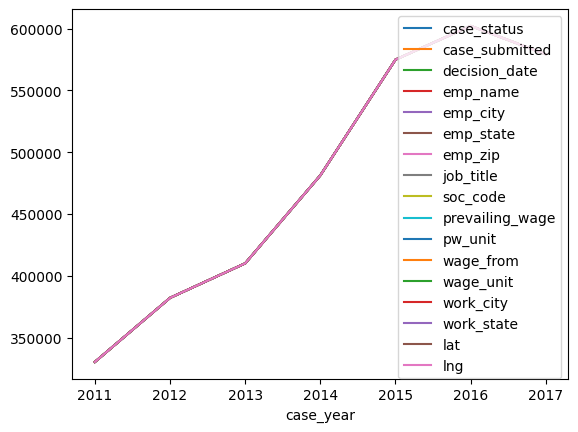

In [49]:
df.groupby('case_year').count().plot() # using plot diagram

<Axes: xlabel='case_year', ylabel='case_status'>

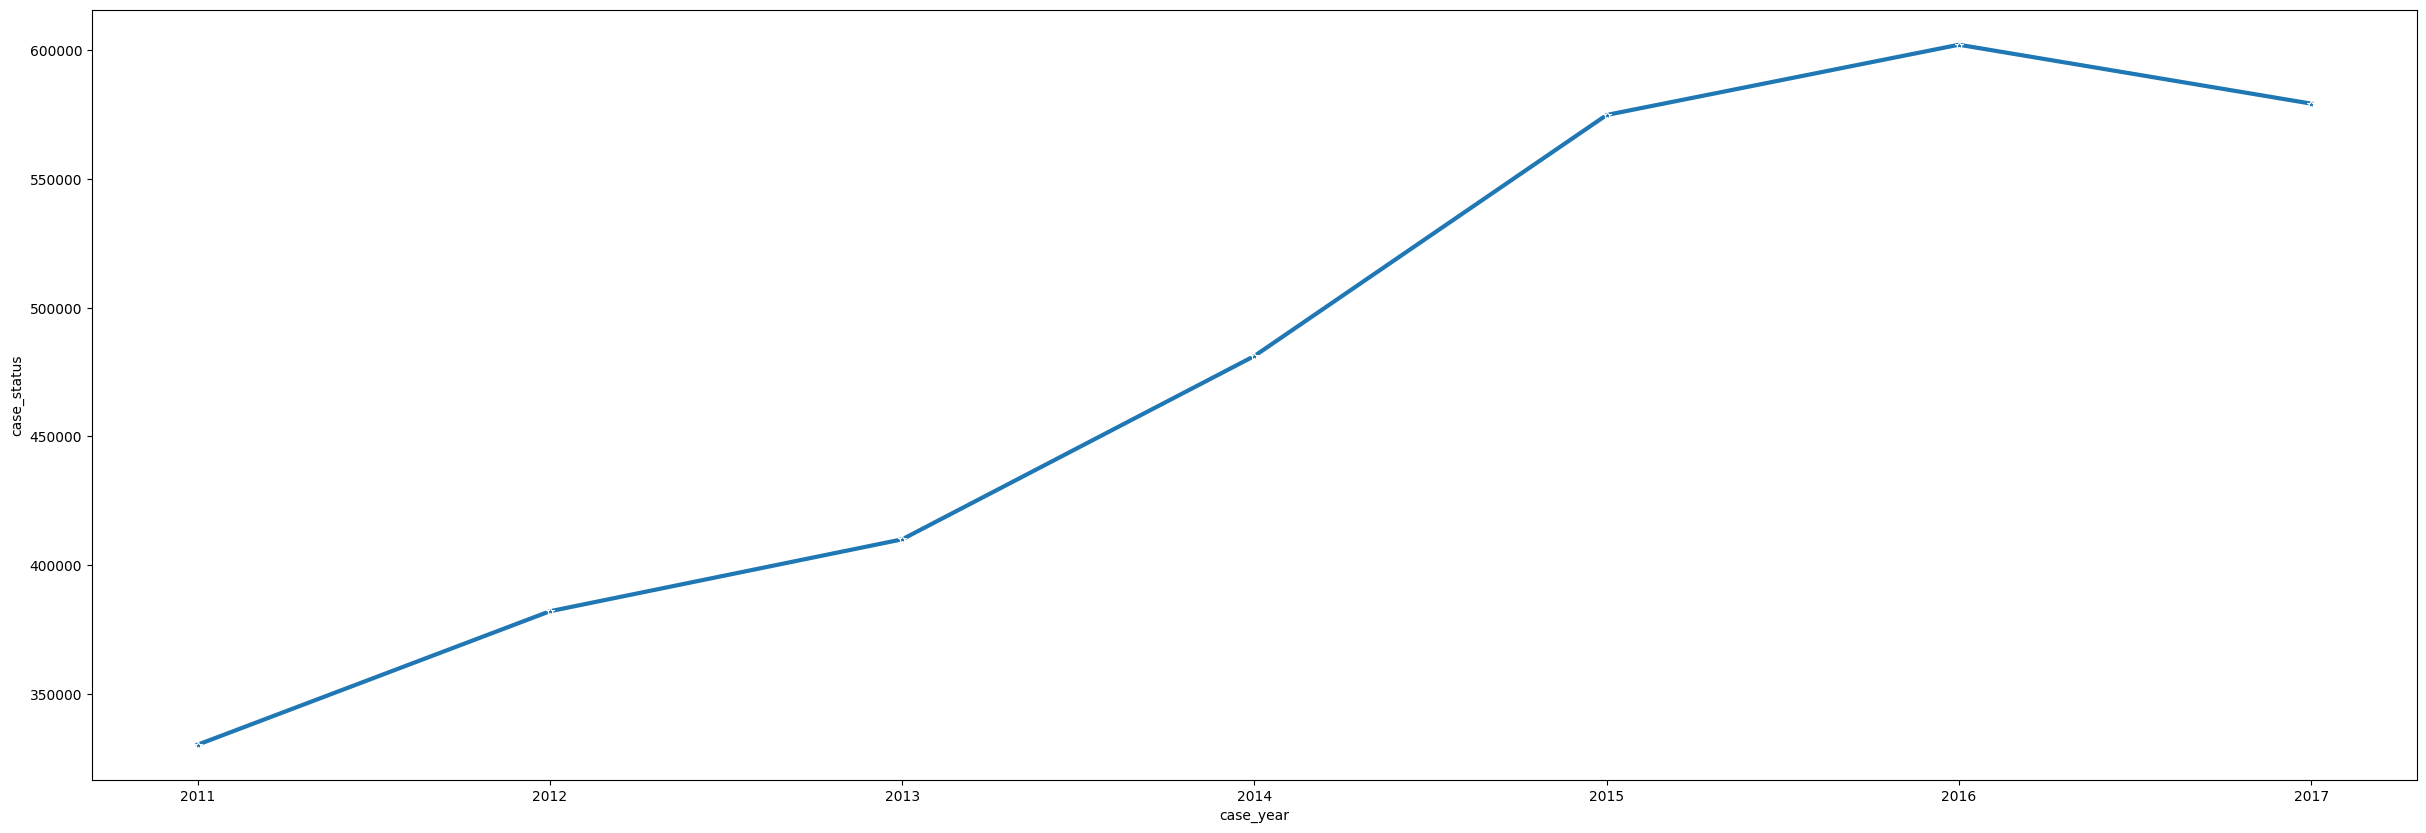

In [50]:
perannum = df.groupby('case_year').count()
plt.figure(figsize=(30,10))
sns.lineplot(data=perannum['case_status'],linewidth=3, marker='*')

In [51]:
df.groupby('case_year').count() ## using table graph

case_status  case_submitted  decision_date  emp_name  emp_city  \
case_year                                                                   
2011            330284          330284         330284    330284    330284   
2012            382116          382116         382116    382116    382116   
2013            410049          410049         410049    410049    410049   
2014            481254          481254         481254    481254    481254   
2015            574872          574872         574872    574872    574872   
2016            602153          602153         602153    602153    602153   
2017            579273          579273         579273    579273    579273   

           emp_state  emp_zip  job_title  soc_code  prevailing_wage  pw_unit  \
case_year                                                                      
2011          330284   330284     330284    330284           330284   330284   
2012          382116   382116     382116    382116           382116   382116   
2013          410049   410049     410049    410049           410049   410049   
2014          481254   481254     481254    481254           481254   481254   
2015          574872   574872     574872    574872           574872   574872   
2016          602153   602153     602153    602153           602153   602153   
2017          579273   579273     579273    579273           579273   579273   

           wage_from  wage_unit  work_city  work_state     lat     lng  
case_year                                                               
2011          330284     330284     330284      330284  330284  330284  
2012          382116     382116     382116      382116  382116  382116  
2013          410049     410049     410049      410049  410049  410049  
2014          481254     481254     481254      481254  481254  481254  
2015          574872     574872     574872      574872  574872  574872  
2016          602153     602153     602153      602153  602153  602153  
2017          579273     579273     579273      579273  579273  579273

Q2. How many Case Status have been Certified/ Certified Withdrawn/ Denied/ Withdrawn within the year of 2011 and 2018?

The numbers of Cases approved are higher than denied Cases over the past year which considered a great deal. As shown in the table and bar chart below.According to the data we have, we can see that the majority of candidates that applied have had their visa requests granted.

In [52]:
df.groupby('case_status').count() # using table graph

case_year  case_submitted  decision_date  emp_name  emp_city  \
case_status                                                                 
C              2935633         2935633        2935633   2935633   2935633   
CW              235866          235866         235866    235866    235866   
D                87413           87413          87413     87413     87413   
W               101089          101089         101089    101089    101089   

             emp_state  emp_zip  job_title  soc_code  prevailing_wage  \
case_status                                                             
C              2935633  2935633    2935633   2935633          2935633   
CW              235866   235866     235866    235866           235866   
D                87413    87413      87413     87413            87413   
W               101089   101089     101089    101089           101089   

             pw_unit  wage_from  wage_unit  work_city  work_state      lat  \
case_status                                                                  
C            2935633    2935633    2935633    2935633     2935633  2935633   
CW            235866     235866     235866     235866      235866   235866   
D              87413      87413      87413      87413       87413    87413   
W             101089     101089     101089     101089      101089   101089   

                 lng  
case_status           
C            2935633  
CW            235866  
D              87413  
W             101089

<Axes: xlabel='case_status'>

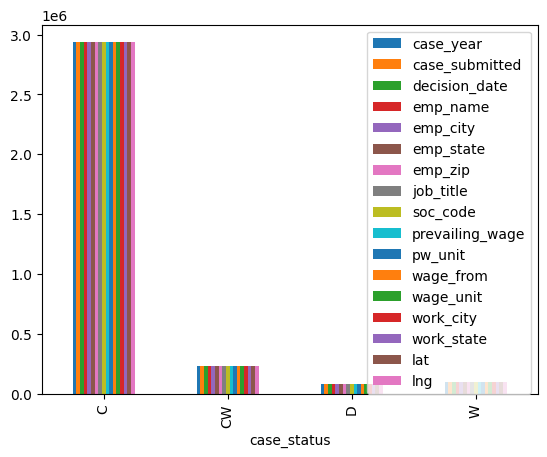

In [53]:
df.groupby('case_status').count().plot(kind = 'bar') # using barchart

In [54]:
df_certified = df[df['case_status'] == 'C'] # shows the number of certidied visa using table graph
df_certified

case_year case_status case_submitted decision_date  \
0             2017           C     2017-02-06    2017-02-10   
1             2017           C     2017-03-21    2017-03-27   
2             2017           C     2017-03-17    2017-03-23   
3             2017           C     2017-03-10    2017-03-16   
4             2017           C     2017-08-04    2017-08-10   
...            ...         ...            ...           ...   
3360803       2011           C     2010-10-12    2010-10-18   
3360804       2011           C     2011-09-06    2011-09-12   
3360807       2011           C     2011-06-22    2011-06-28   
3360808       2011           C     2011-06-16    2011-06-22   
3360809       2011           C     2011-03-10    2011-03-16   

                                emp_name      emp_city emp_state emp_zip  \
0               LAKELANDS NEPHROLOGY, PA     GREENWOOD        SC   29646   
1                    UNIVERSITY OF IDAHO        MOSCOW        ID   83844   
2                 XPO SUPPLY CHAIN, INC.    HIGH POINT        NC   27265   
3        C AND S WHOLESALE GROCERS, INC.         KEENE        NH   03431   
4                         SANFORD CLINIC   SIOUX FALLS        SD   57117   
...                                  ...           ...       ...     ...   
3360803    ORDER FULFILLMENT GROUP, INC.    ZIONSVILLE        IN   46077   
3360804  HEALTH CARE SERVICE CORPORATION       CHICAGO        IL   60601   
3360807          DELOITTE CONSULTING LLP  PHILADELPHIA        PA   19103   
3360808          DELOITTE CONSULTING LLP  PHILADELPHIA        PA   19103   
3360809          DELOITTE CONSULTING LLP  PHILADELPHIA        PA   19103   

                           job_title    soc_code  prevailing_wage pw_unit  \
0                       NEPHROLOGIST     29-1063         187200.0       Y   
1               POST DOCTORAL FELLOW     19-1013          39957.0       Y   
2                  OPERATION ANALYST     15-2031          59966.0       Y   
3            SR. INDUSTRIAL ENGINEER     17-2112          78832.0       Y   
4            HEMATOLOGIST/ONCOLOGIST     29-1069         169645.0       Y   
...                              ...         ...              ...     ...   
3360803       DATABASE ADMINISTRATOR  15-1061.00          40997.0       Y   
3360804             FAMS ANALYST III     15-1121          60882.0       Y   
3360807            SENIOR CONSULTANT  15-1051.00          50794.0       Y   
3360808  BUSINESS TECHNOLOGY ANALYST  15-1051.00          42536.0       Y   
3360809                  ASSOCIATE 6  15-1031.00          56347.0       Y   

         wage_from wage_unit   work_city work_state        lat         lng  
0        190000.00         Y   ABBEVILLE         SC  34.178172  -82.379015  
1         47507.00         Y    ABERDEEN         ID  42.944078 -112.838326  
2         65000.00         Y    ABERDEEN         MD  39.509556  -76.164120  
3         86988.15         Y    ABERDEEN         MD  39.509556  -76.164120  
4        450000.00         Y    ABERDEEN         SD  45.464698  -98.486483  
...            ...       ...         ...        ...        ...         ...  
3360803   45000.00         Y  ZIONSVILLE         IN  39.950873  -86.261937  
3360804   65000.00         Y  ZIONSVILLE         IN  39.950873  -86.261937  
3360807   76000.00         Y    ZUMBROTA         MN  44.294132  -92.669081  
3360808   60000.00         Y    ZUMBROTA         MN  44.294132  -92.669081  
3360809   98000.00         Y    ZUMBROTA         MN  44.294132  -92.669081  

[2935633 rows x 18 columns]

Q3. Is there a pattern in the number of H1-B visas being rejected over time? Would be a question to consider asking.

Over time, there has been a decline in the number of visas denied.

In [55]:
df_denied = df[df['case_status'] == 'D'] # shows the number of denied visa using table graph
df_denied

case_year case_status case_submitted decision_date  \
21            2017           D     2017-02-02    2017-02-08   
29            2017           D     2017-05-30    2017-06-05   
109           2017           D     2017-03-04    2017-03-09   
202           2017           D     2017-06-02    2017-06-07   
289           2017           D     2017-03-14    2017-03-20   
...            ...         ...            ...           ...   
3360793       2011           D     2011-01-06    2011-01-11   
3360794       2011           D     2010-10-28    2010-11-02   
3360795       2011           D     2010-10-18    2010-10-21   
3360799       2011           D     2011-01-03    2011-01-06   
3360806       2011           D     2010-10-06    2010-10-06   

                                                  emp_name    emp_city  \
21                             HARDIN - SIMMONS UNIVERSITY     ABILENE   
29                                      MCMURRY UNIVERSITY     ABILENE   
109                                   KPIT INFOSYSTEMS INC      EDISON   
202                                   APPS ASSOCIATES, LLC       ACTON   
289                        FLO-TECH MECHANICAL SYSTEMS INC     ADDISON   
...                                                    ...         ...   
3360793           MIDWESTERN REGIONAL MEDICAL CENTER, INC.        ZION   
3360794                        GREENPATH HEALTH GROUP, LLC        ZION   
3360795                        GREENPATH HEALTH GROUP, LLC        ZION   
3360799           MIDWESTERN REGIONAL MEDICAL CENTER, INC.        ZION   
3360806  ZIONSVILLE MARIA MONTESSORI INTERNATIONAL ACAD...  ZIONSVILLE   

        emp_state emp_zip                       job_title    soc_code  \
21             TX   79698  ASSISTANT PROFESSOR OF NURSING     25-1072   
29             TX   79697                 ESL INSTRUCTIOR     25-1199   
109            NJ   08837    TECHNO-FUNCTIONAL CONSULTANT     15-1121   
202            MA   01720                STAFF CONSULTANT     15-1121   
289            IL   60101             ELECTRICAL ENGINEER     17-2071   
...           ...     ...                             ...         ...   
3360793        IL   60099             SURGICAL ONCOLOGIST  29-1067.00   
3360794        IL   60099          ADVANCED CARDIAC NURSE  29-1115.00   
3360795        IN   60099                 NURSE - CARDIAC  29-1115.00   
3360799        IL   60099             SURGICAL ONCOLOGIST  29-1067.00   
3360806        IN   46077                         TEACHER  25-2021.00   

         prevailing_wage pw_unit  wage_from wage_unit   work_city work_state  \
21               60307.0       Y    90000.0         Y     ABILENE         TX   
29               24340.0       Y    25064.0         Y     ABILENE         TX   
109              88067.0       Y    85025.0         Y       ACTON         MA   
202              78603.0       Y    75000.0         Y       ACTON         MA   
289              81515.0       Y    82000.0         Y     ADDISON         IL   
...                  ...     ...        ...       ...         ...        ...   
3360793         249000.0       Y   250000.0         Y        ZION         IL   
3360794          61048.0       Y    61048.0         Y        ZION         IL   
3360795          61048.0       Y    61048.0         Y        ZION         IL   
3360799         249000.0       Y   250000.0         Y        ZION         IL   
3360806          28350.0       Y    28350.0         Y  ZIONSVILLE         IN   

               lat        lng  
21       32.448736 -99.733144  
29       32.448736 -99.733144  
109      42.485093 -71.432840  
202      42.485093 -71.432840  
289      41.931696 -87.988956  
...            ...        ...  
3360793  42.446132 -87.832851  
3360794  42.446132 -87.832851  
3360795  42.446132 -87.832851  
3360799  42.446132 -87.832851  
3360806  39.950873 -86.261937  

[87413 rows x 18 columns]

<Axes: xlabel='case_year'>

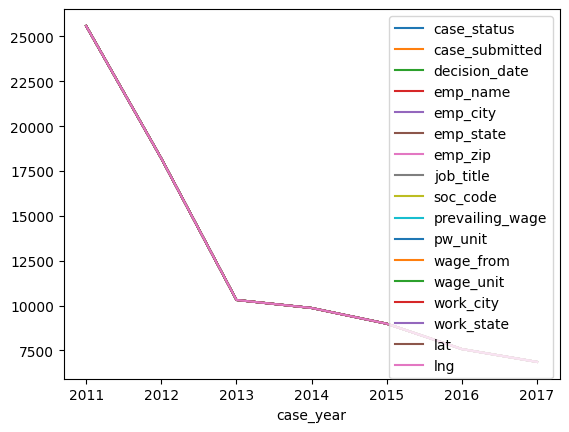

In [56]:
df_denied.groupby('case_year').count().plot() # using plot diagram

Q4. Do those whose H1-B visas have been approved generally make more money than those whose visas have been denied?

It is obvious from the data provided given that the average salary of those whose visa applications were rejected is higher than the salary of those whose visa applications were approved.

In [57]:
df_denied_wage = df_denied['prevailing_wage']
df_denied_count = df_denied['case_status'].count()
df_denied_avg = ((df_denied_wage.sum())/df_denied_count)


print("Avg wage of visa denied candidates:",  df_denied_avg)

df_certified_wage = df_certified['prevailing_wage']
df_certified_count = df_certified['case_status'].count()
df_certified_avg = ((df_certified_wage.sum())/df_certified_count)


print("Avg wage of visa certified candidates:",  df_certified_avg)

Avg wage of visa denied candidates: 94607.26143468362
Avg wage of visa certified candidates: 67109.37093917688


Q5. Which job title have the more withdrawn job satus? (An employer or a company can withdrwan a job offer if the conditions of the offer are not met).

The barchart and the table below show that :

1. Software engineer
2. Zerista inc.
3. Yu shan Co USA LTD
4. Youth Sports Coordinator
5. Youth Program Developer
6. Youth Manager
7. Youth Development Counselor
8. Youth Advocate
9. Yield Senior Product Engineer


In [58]:
df_withdrawn = df[(df["case_status"]=='W')]
df_withdrawn

case_year case_status case_submitted decision_date  \
39            2017           W     2017-03-07    2017-03-07   
41            2017           W     2017-07-31    2017-07-31   
123           2017           W     2016-11-10    2016-11-11   
138           2017           W     2017-04-24    2017-07-25   
205           2017           W     2017-02-20    2017-02-23   
...            ...         ...            ...           ...   
3360746       2011           W     2011-01-30    2011-01-30   
3360779       2011           W     2011-06-10    2011-06-10   
3360782       2011           W     2011-06-10    2011-06-15   
3360788       2011           W     2010-11-15    2010-11-15   
3360805       2011           W     2011-09-01    2011-09-06   

                                             emp_name     emp_city emp_state  \
39                               HEALTH CAROUSEL, LLC   CINCINNATI        OH   
41       TEXAS TECH UNIVERSITY HEALTH SCIENCES CENTER      LUBBOCK        TX   
123                   L&T TECHNOLOGY SERVICES LIMITED       EDISON        NJ   
138                     L&T TECHNOLOGY SERVICES, LTD.       EDISON        NJ   
205                              APPS ASSOCIATES, LLC        ACTON        MA   
...                                               ...          ...       ...   
3360746              NEW BAKERY COMPANY OF OHIO, INC.   ZANESVILLE        OH   
3360779                          OPTICOMP CORPORATION  ZEPHYR COVE        NV   
3360782                          OPTICOMP CORPORATION  ZEPHYR COVE        NV   
3360788                   GREENPATH HEALTH GROUP, LLC         ZION        IL   
3360805               HEALTH CARE SERVICE CORPORATION      CHICAGO        IL   

        emp_zip                       job_title    soc_code  prevailing_wage  \
39        45209              PHYSICAL THERAPIST     29-1123            32.02   
41        79430              RESEARCH ASSOCIATE     19-4021            18.49   
123       08817                    HILL ROM INC     17-2199         68494.00   
138       08817             MECHANICAL ENGINEER     17-2141         76523.00   
205       01720                PRACTICE MANAGER     11-3021        122491.00   
...         ...                             ...         ...              ...   
3360746   43701                R&D TECHNOLOGIST  19-1012.00         48360.00   
3360779   89448  OPTOELECTRONIC DEVICE ENGINEER  17-2071.00         89149.00   
3360782   89448  OPTOELECTRONIC DEVICE ENGINEER  17-2071.00         89149.00   
3360788   60099           NURSE - REHABILIATION  29-1115.00         67746.00   
3360805   60601                FAMS ANALYST III     15-1121         60882.00   

        pw_unit  wage_from wage_unit    work_city work_state        lat  \
39            H      32.02         H      ABILENE         TX  32.448736   
41            H      18.49         H      ABILENE         TX  32.448736   
123           Y   68494.00         Y        ACTON         MA  42.485093   
138           Y   76523.00         Y        ACTON         MA  42.485093   
205           Y  143749.00         Y        ACTON         MA  42.485093   
...         ...        ...       ...          ...        ...        ...   
3360746       Y   48360.00         Y   ZANESVILLE         OH  39.940345   
3360779       Y   90000.00         Y  ZEPHYR COVE         NV  39.002130   
3360782       Y   90000.00         Y  ZEPHYR COVE         NV  39.002130   
3360788       Y   67746.00         Y         ZION         IL  42.446132   
3360805       Y   65000.00         Y   ZIONSVILLE         IN  39.950873   

                lng  
39       -99.733144  
41       -99.733144  
123      -71.432840  
138      -71.432840  
205      -71.432840  
...             ...  
3360746  -82.013192  
3360779 -119.956014  
3360782 -119.956014  
3360788  -87.832851  
3360805  -86.261937  

[101089 rows x 18 columns]

<Axes: xlabel='job_title'>

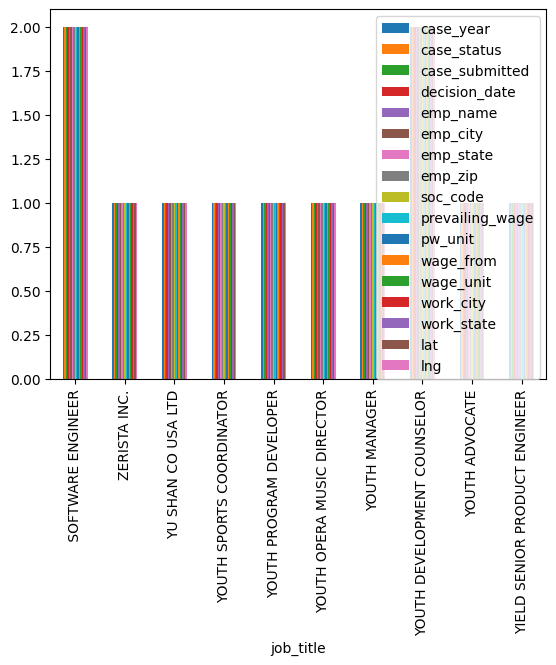

In [59]:
df_withdrawn.groupby('job_title').count().sort_index(ascending=False).head(10).plot(kind = "bar") # using barchart

In [60]:
df_withdrawn.groupby('job_title').count().sort_index(ascending=False).head(20) # using table graph

case_year  case_status  case_submitted  \
job_title                                                                      
 SOFTWARE ENGINEER                            2            2               2   
ZERISTA INC.                                  1            1               1   
YU SHAN CO USA LTD                            1            1               1   
YOUTH SPORTS COORDINATOR                      1            1               1   
YOUTH PROGRAM DEVELOPER                       1            1               1   
YOUTH OPERA MUSIC DIRECTOR                    1            1               1   
YOUTH MANAGER                                 1            1               1   
YOUTH DEVELOPMENT COUNSELOR                   2            2               2   
YOUTH ADVOCATE                                1            1               1   
YIELD SENIOR PRODUCT ENGINEER                 1            1               1   
YIELD ENHANCEMENT ENGINEER                    4            4               4   
YIELD ENGINEER                                8            8               8   
YE/YA ENGINEER                                1            1               1   
YE EFFI ENGINEER                              1            1               1   
YAMAHA MUSIC CERTIFIED PIANO TEACHER          1            1               1   
WW WEBSPHERE APPLICATION EXECUTIVE            1            1               1   
WW READINESS PROGRAM MANAGER                  1            1               1   
WS SECURITY ADMINISTRATORS                    1            1               1   
WRITER/EDITOR                                 1            1               1   
WRITER - BUSINESS PROJECTS                    1            1               1   

                                      decision_date  emp_name  emp_city  \
job_title                                                                 
 SOFTWARE ENGINEER                                2         2         2   
ZERISTA INC.                                      1         1         1   
YU SHAN CO USA LTD                                1         1         1   
YOUTH SPORTS COORDINATOR                          1         1         1   
YOUTH PROGRAM DEVELOPER                           1         1         1   
YOUTH OPERA MUSIC DIRECTOR                        1         1         1   
YOUTH MANAGER                                     1         1         1   
YOUTH DEVELOPMENT COUNSELOR                       2         2         2   
YOUTH ADVOCATE                                    1         1         1   
YIELD SENIOR PRODUCT ENGINEER                     1         1         1   
YIELD ENHANCEMENT ENGINEER                        4         4         4   
YIELD ENGINEER                                    8         8         8   
YE/YA ENGINEER                                    1         1         1   
YE EFFI ENGINEER                                  1         1         1   
YAMAHA MUSIC CERTIFIED PIANO TEACHER              1         1         1   
WW WEBSPHERE APPLICATION EXECUTIVE                1         1         1   
WW READINESS PROGRAM MANAGER                      1         1         1   
WS SECURITY ADMINISTRATORS                        1         1         1   
WRITER/EDITOR                                     1         1         1   
WRITER - BUSINESS PROJECTS                        1         1         1   

                                      emp_state  emp_zip  soc_code  \
job_title                                                            
 SOFTWARE ENGINEER                            2        2         2   
ZERISTA INC.                                  1        1         1   
YU SHAN CO USA LTD                            1        1         1   
YOUTH SPORTS COORDINATOR                      1        1         1   
YOUTH PROGRAM DEVELOPER                       1        1         1   
YOUTH OPERA MUSIC DIRECTOR                    1        1         1   
YOUTH MANAGER                                 1        1         1

Q6. How are the prevaling wage has been distrbuted using only cerified case? 

The displot of Wage distribution below shows that:
A. There are wages varying between 20K per year to more than 100K per year
B. Most of them get in the salary bracket of 40k to 80K
C. The data is not normally distributed (The data is slightly more skewed towards the higher end rather than distributed consistently around the peak)

In [61]:
total_certified_cases = df[df['case_status']=='C']
certified_cases = total_certified_cases[total_certified_cases['prevailing_wage']<100000]

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3080\610716434.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(certified_cases['prevailing_wage'],bins=70,kde=True,hist_kws={"edgecolor": "red"})


Text(0.5, 1.0, 'WAGE DISTRIBUTION BETWEEN 2011 TO 2018')

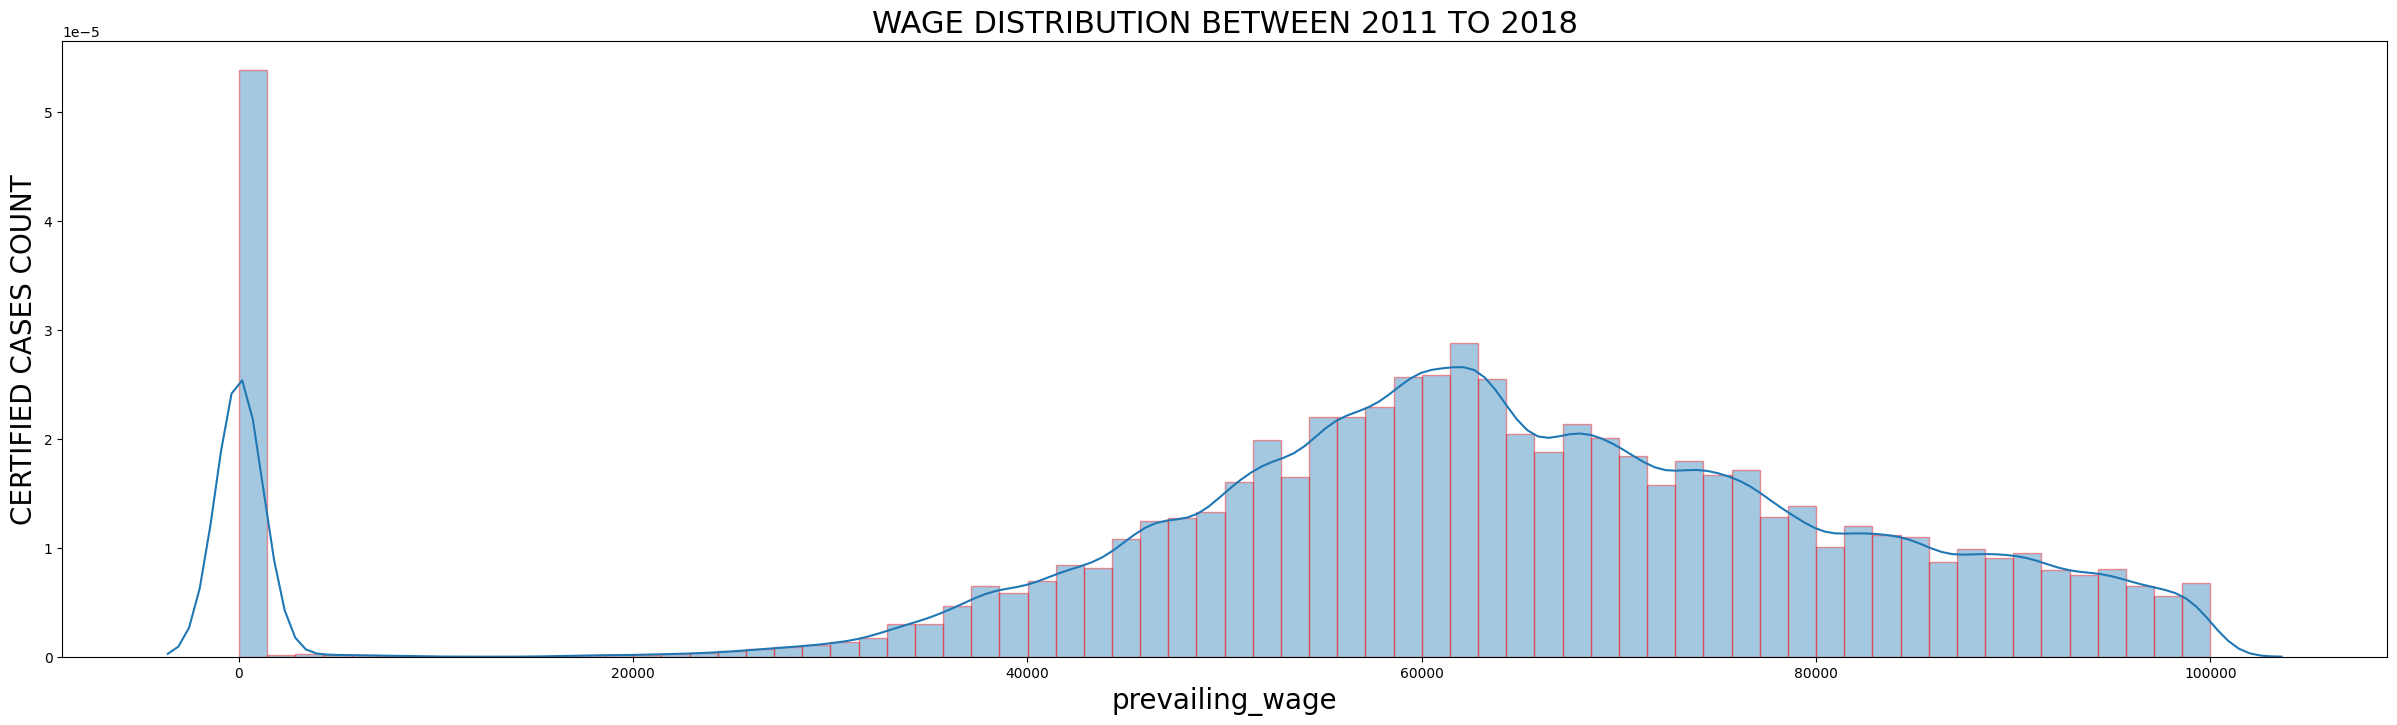

In [62]:
plt.figure(figsize=(30,8))
sns.distplot(certified_cases['prevailing_wage'],bins=70,kde=True,hist_kws={"edgecolor": "red"})
plt.xlabel('prevailing_wage',size=20)
plt.ylabel('CERTIFIED CASES COUNT', size=20)
plt.title('WAGE DISTRIBUTION BETWEEN 2011 TO 2018',size=22)

Q7. Who are the main benificiaries of H1B?

It is predominately dominated by greater number of IT companies.The below table and the chart represent the count and a graphical representation of the same

In [63]:
top_twenty=certified_cases['emp_name'].value_counts()[:20]
top_twenty.to_frame()

emp_name
INFOSYS LIMITED                                    140531
TATA CONSULTANCY SERVICES LIMITED                   74247
WIPRO LIMITED                                       43618
DELOITTE CONSULTING LLP                             38154
ACCENTURE LLP                                       35036
IBM INDIA PRIVATE LIMITED                           33213
HCL AMERICA, INC.                                   23129
CAPGEMINI AMERICA INC                               21249
ERNST & YOUNG U.S. LLP                              21180
MICROSOFT CORPORATION                               17506
LARSEN & TOUBRO INFOTECH LIMITED                    16257
TECH MAHINDRA (AMERICAS),INC.                       15564
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     15218
IBM CORPORATION                                     10777
IGATE TECHNOLOGIES INC.                             10735
DELOITTE & TOUCHE LLP                               10141
INTEL CORPORATION                                    9464
AMAZON CORPORATE LLC                                 7605
GOOGLE INC.                                          6586
SYNTEL CONSULTING INC.                               6399

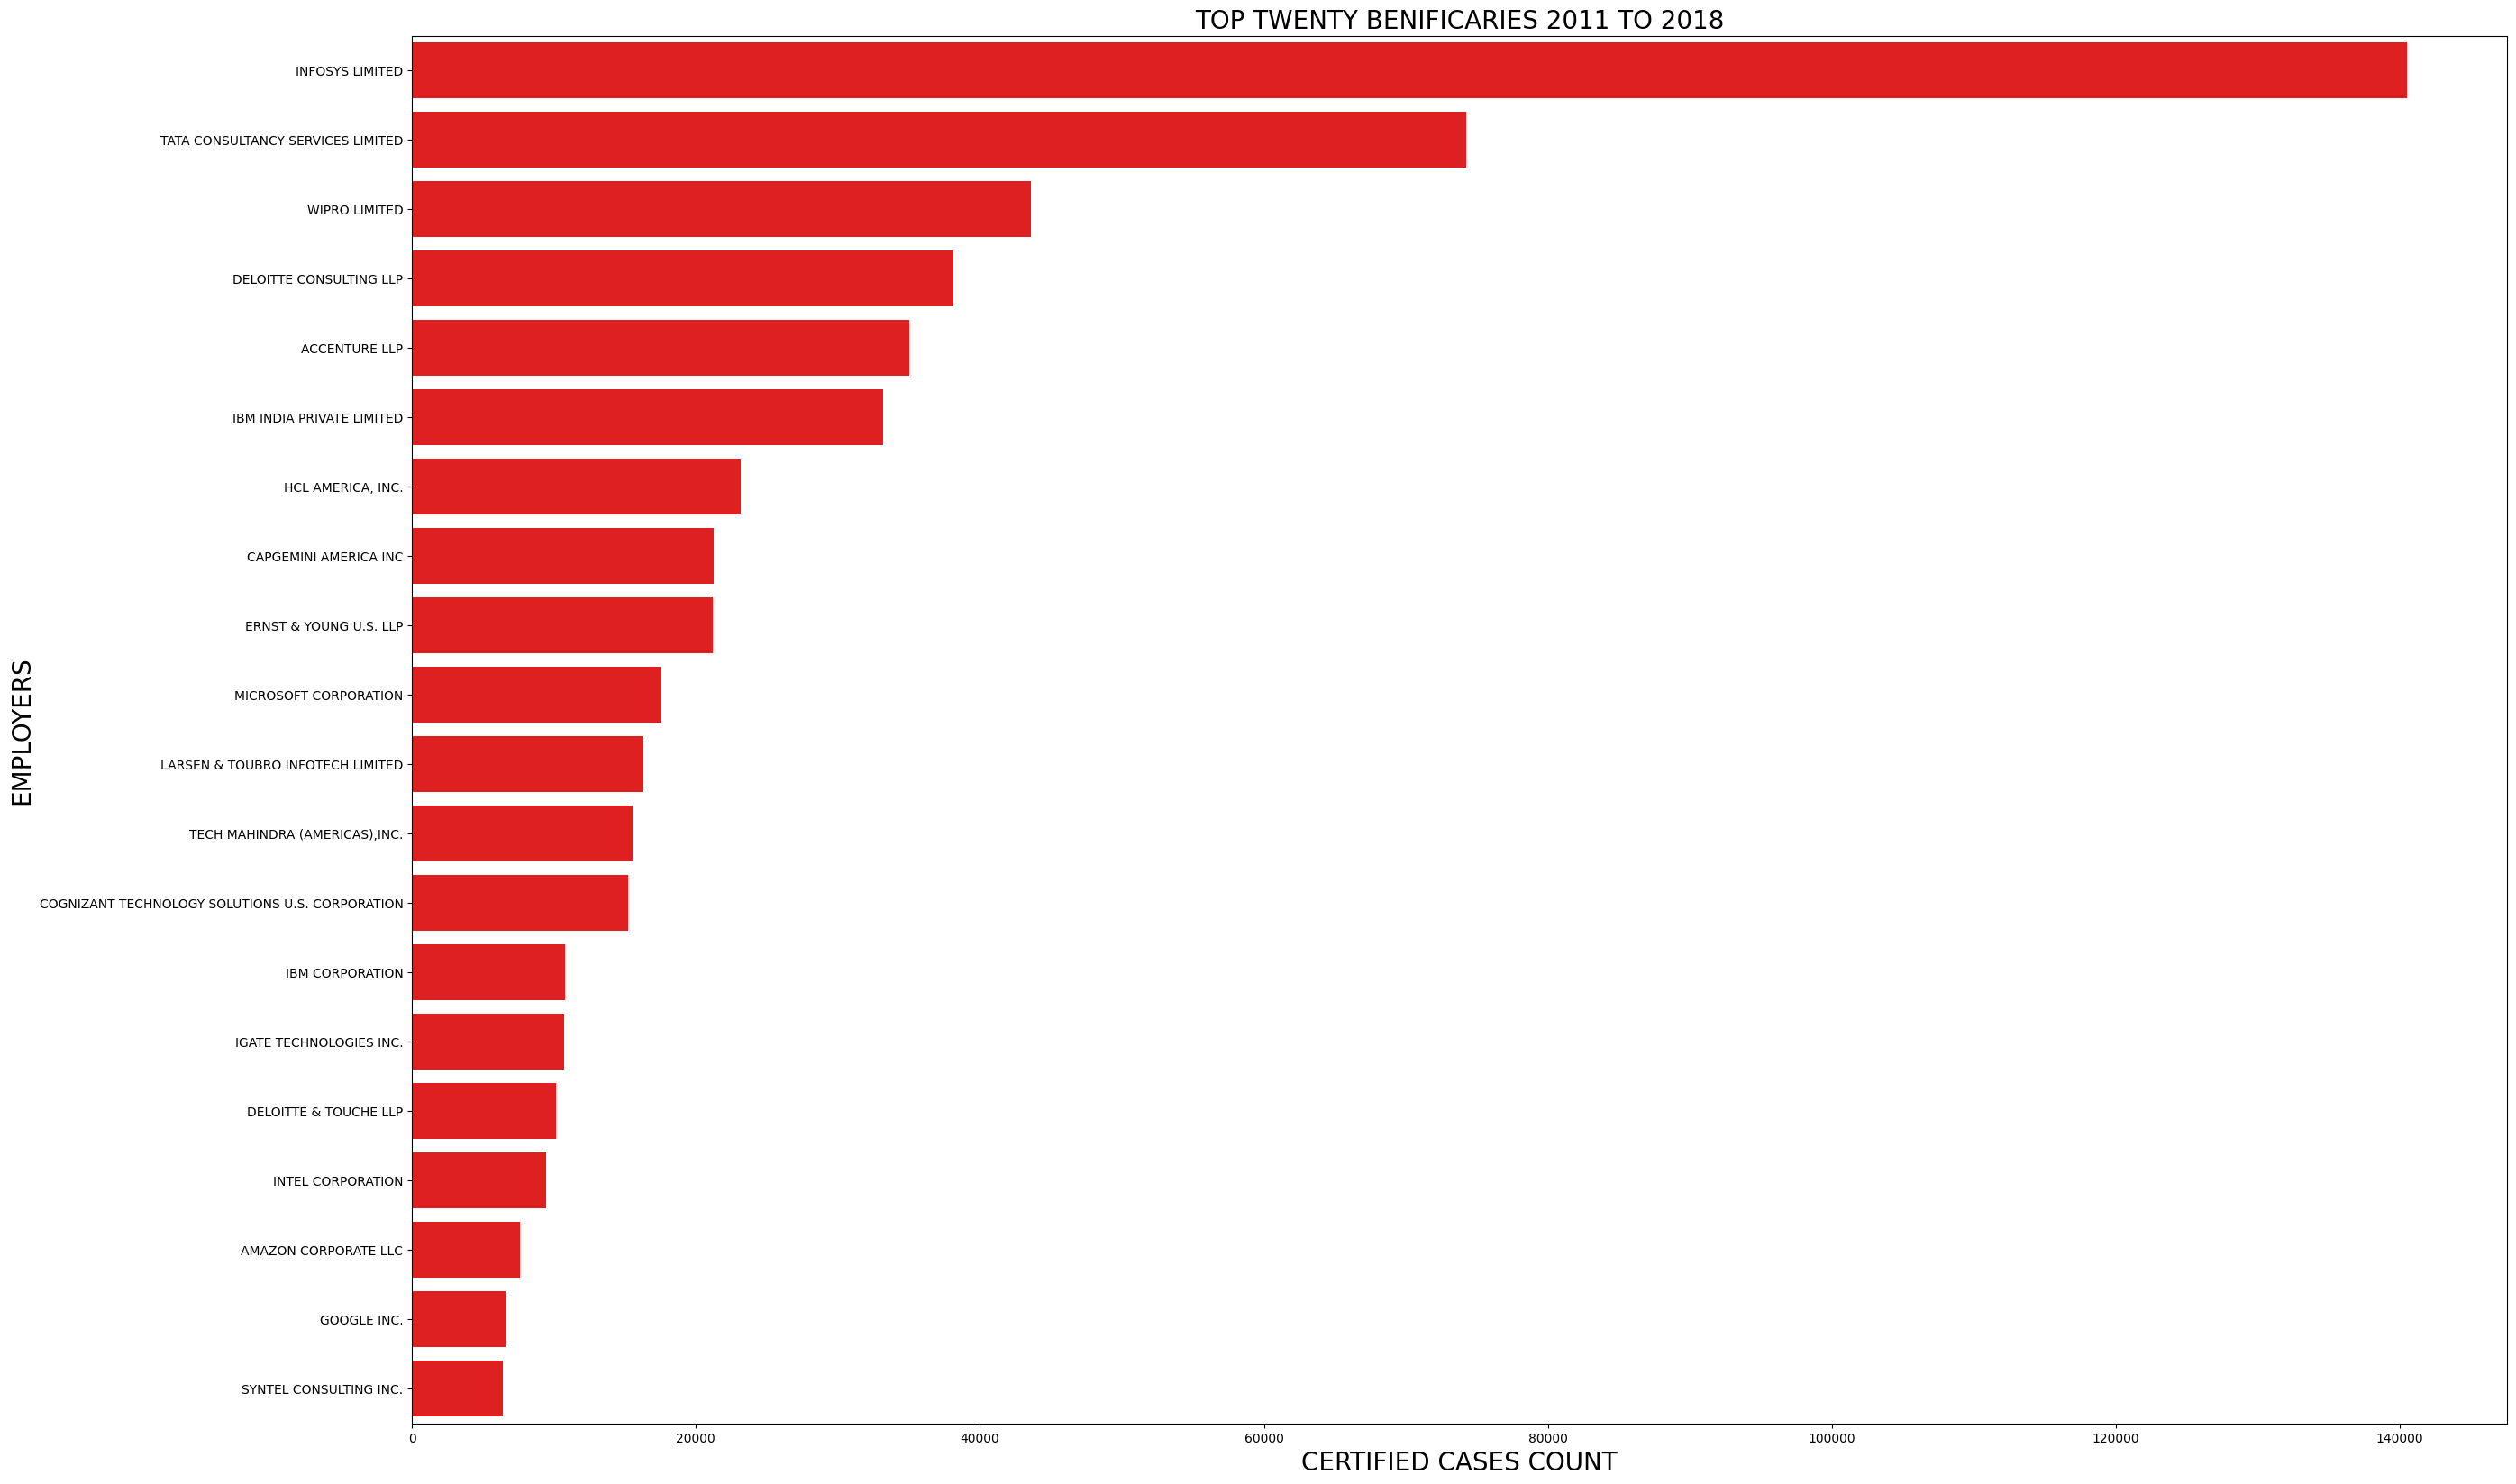

In [64]:
plt.figure(figsize=(30,20))
sns.barplot(x=top_twenty.values,y=top_twenty.index,color='red')
plt.xlabel('CERTIFIED CASES COUNT',size=20)
plt.ylabel('EMPLOYERS', size=20)
plt.title('TOP TWENTY BENIFICARIES 2011 TO 2018',size=20)
plt.show()

Q8. Identify the top 5 H1B beneficiaries and examine the distribution of their salaries? 

(Using distplot diagram and barplot)

1. Infosys Limited (40000 TO 100000 )
2. TaTa Consultancy Services Limited (40000 TO 80000)
3. Wipro Limited (60000 TO 100000)
4. Deloitte Consulting LLP (40000 TO 100000)
5. Accenture LLP (40000 TO 100000)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3080\1256655882.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wage ,ax=axes[rowcount],bins=100,hist_kws= {"edgecolor":"#E6E6E6", "color": "#EE6666"}, kde=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3080\1256655882.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

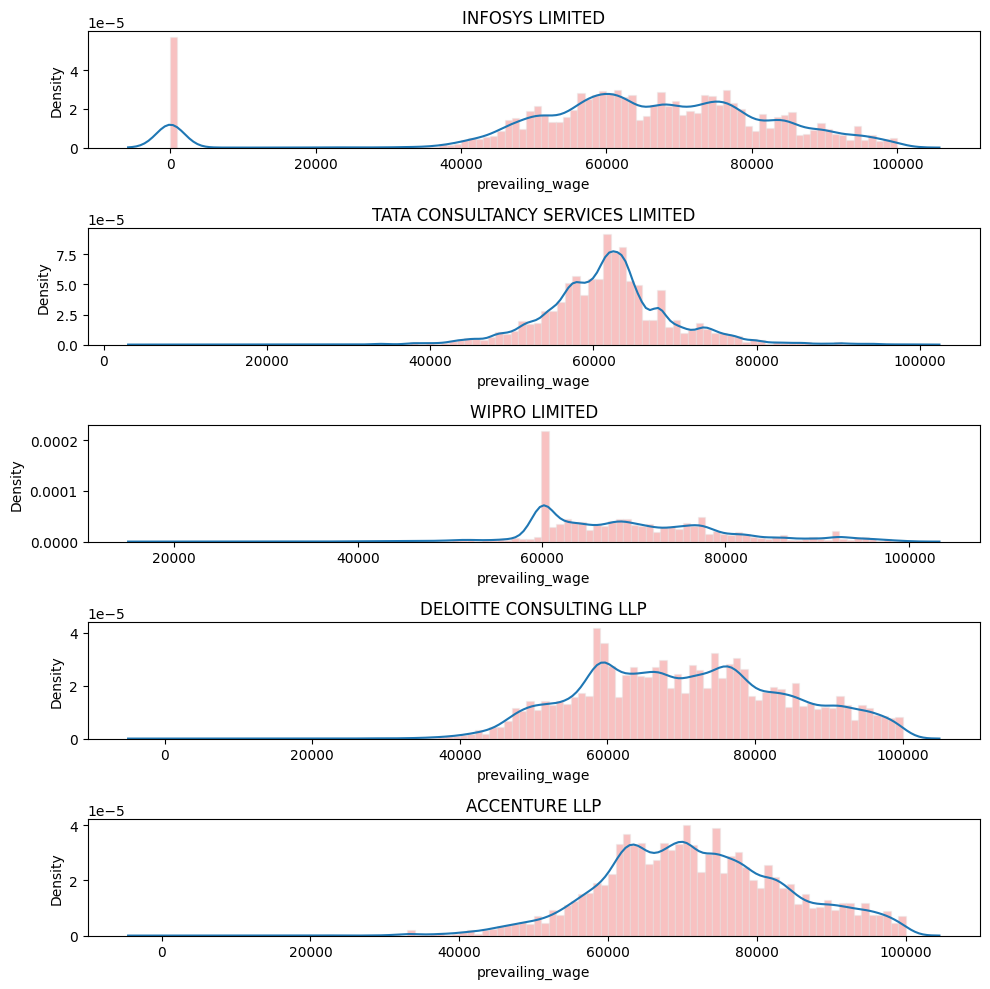

In [65]:
f,axes = plt.subplots(nrows=5,ncols=1, figsize=(10,10),sharey=False)
rowcount=0
companies = top_twenty.index[:5]
for company in companies:
    axes[rowcount].set_title(company)
    wage = certified_cases[certified_cases['emp_name']==company]['prevailing_wage']
    sns.distplot(wage ,ax=axes[rowcount],bins=100,hist_kws= {"edgecolor":"#E6E6E6", "color": "#EE6666"}, kde=True)
    rowcount+=1
    
plt.tight_layout()

Text(0.5, 1.0, 'TOP JOB BENIFICARIES 2011 TO 2018')

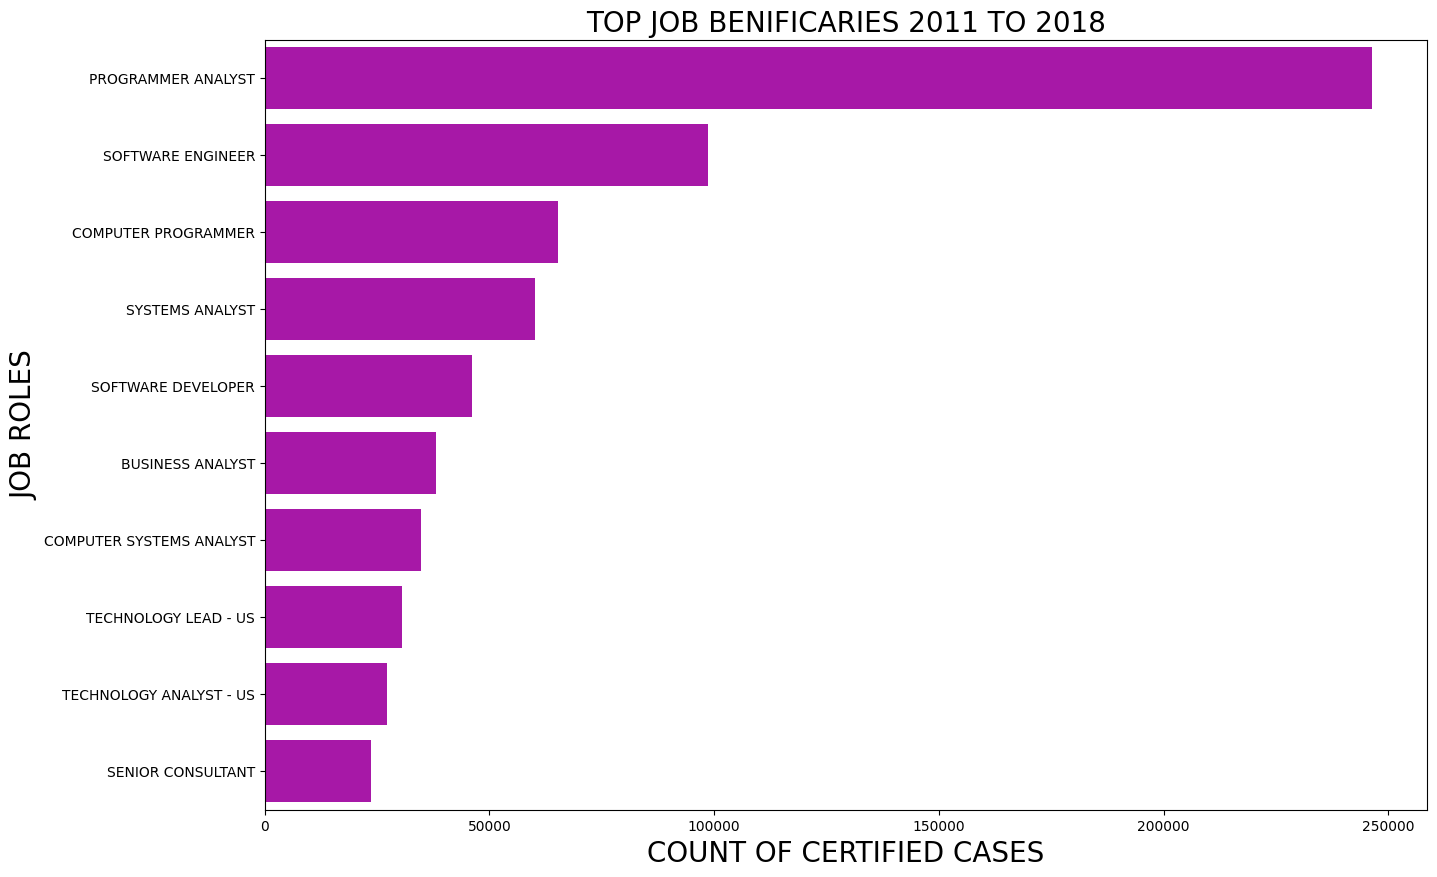

In [66]:
top_roles = certified_cases['job_title'].value_counts().head(10)
plt.figure(figsize=(15,10))
sns.barplot(y = top_roles.index ,x = top_roles.values ,color='m')
plt.xlabel('COUNT OF CERTIFIED CASES',size=20)
plt.ylabel('JOB ROLES', size=20)
plt.title('TOP JOB BENIFICARIES 2011 TO 2018',size=20)

Q9. Which states have the highest employer?
As its shown in the below bar chart 
1. CA....California
2. TX....Texas 
3. NJ....New Jersey
4. NY....New York
5. IL....Illinois

<Axes: >

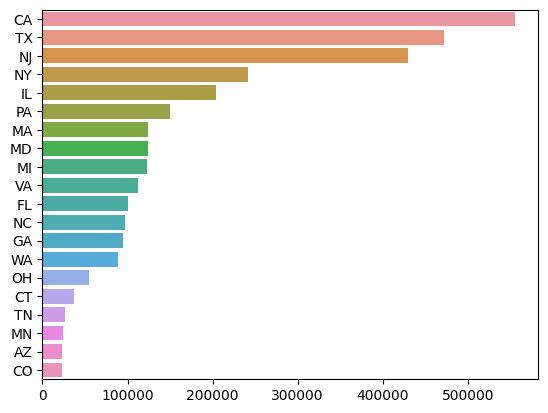

In [67]:
work_place = df["emp_state"].value_counts()[:20]
sns.barplot(x= work_place.values, y= work_place.index)

Q10. Which states have the most higher wage? 

1. WA -Washington 
2. CA -California
3. AS -American Samoa
4. ND -North Dakota
5. ME -Maine


In [68]:
pd.options.display.float_format = '{:,.2f}'.format
df.groupby('emp_state').agg({'prevailing_wage':'mean'}).sort_values(by = ['prevailing_wage'], ascending = False)[:10]

prevailing_wage
emp_state                 
WA               82,839.11
CA               80,054.21
AS               78,250.00
ND               75,516.79
ME               75,167.32
SD               74,708.02
IL               73,446.56
PW               72,536.67
AR               70,916.03
MA               70,296.64

Q11. what is the relationship between case year , status and jobtitle?

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3080\1584973229.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  cer_den.pivot('case_year','case_status','job_title').plot.bar(width=0.8)


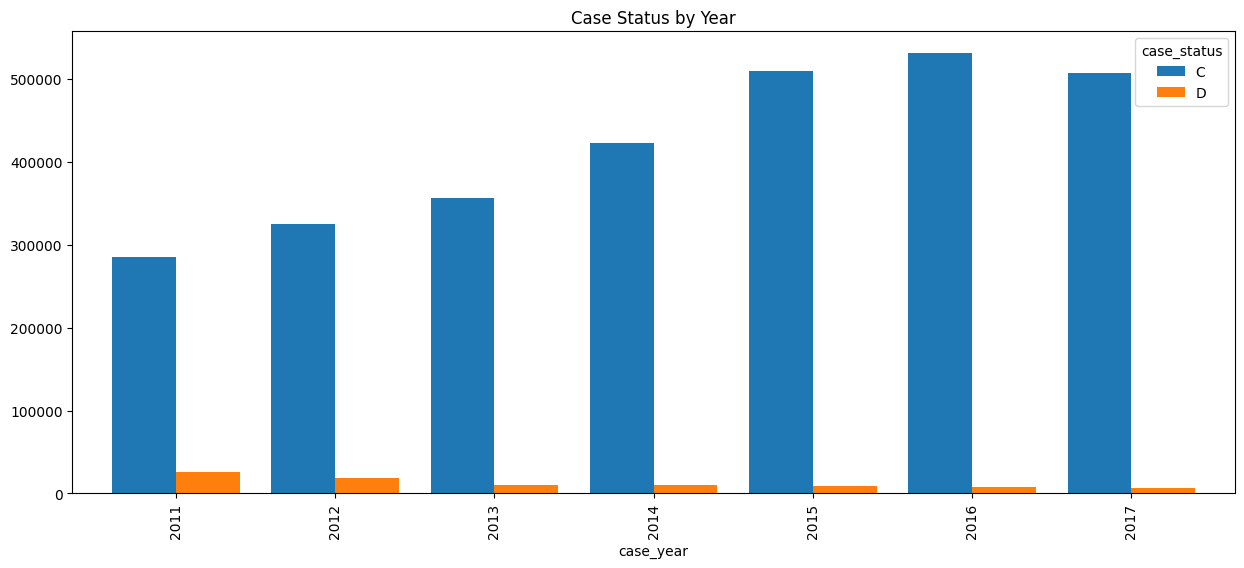

In [69]:
cer_den=df[df['case_status'].isin(['C','D'])]
cer_den=cer_den.groupby(['case_year','case_status'])['job_title'].count().reset_index()
cer_den.pivot('case_year','case_status','job_title').plot.bar(width=0.8)
fig=plt.gcf()
fig.set_size_inches(15,6)
plt.title('Case Status by Year')
plt.show()

Q12. Choose a diagram to show the relationship between employer name, job title and case satatus?

<Axes: xlabel='emp_name', ylabel='case_status'>

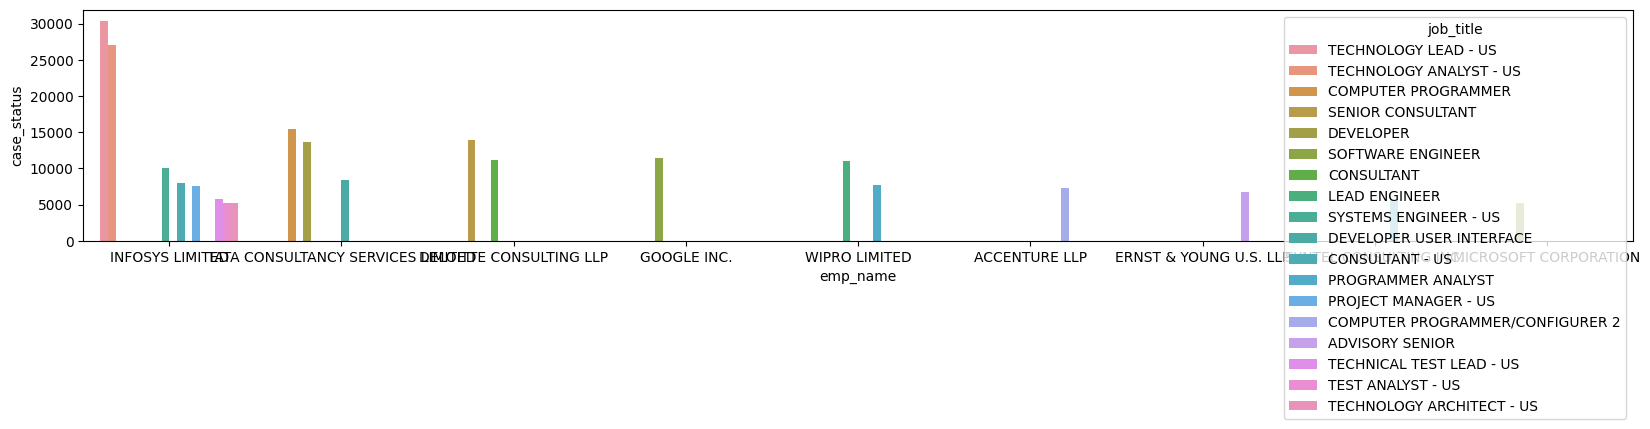

In [70]:
fig, ax = plt.subplots(figsize = (20,3))
sns.barplot(x= 'emp_name',hue = 'job_title',y = 'case_status', data = df.groupby(['job_title','emp_name']).count()['case_status'].sort_values(ascending = False)[:20].reset_index())

Q13. How the prevailing unit could affect prevailing wage and case year?

<Axes: xlabel='pw_unit'>

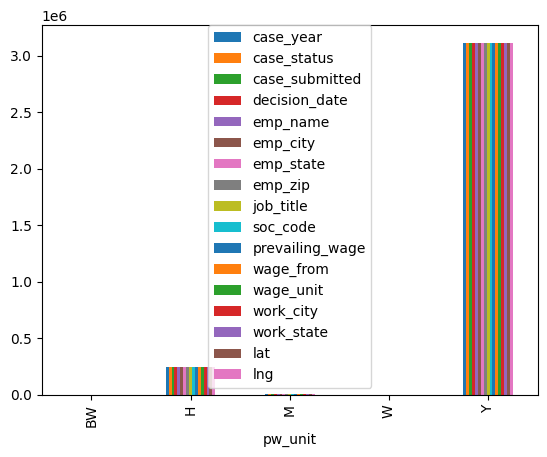

In [71]:
df.groupby('pw_unit').count().plot(kind = 'bar')

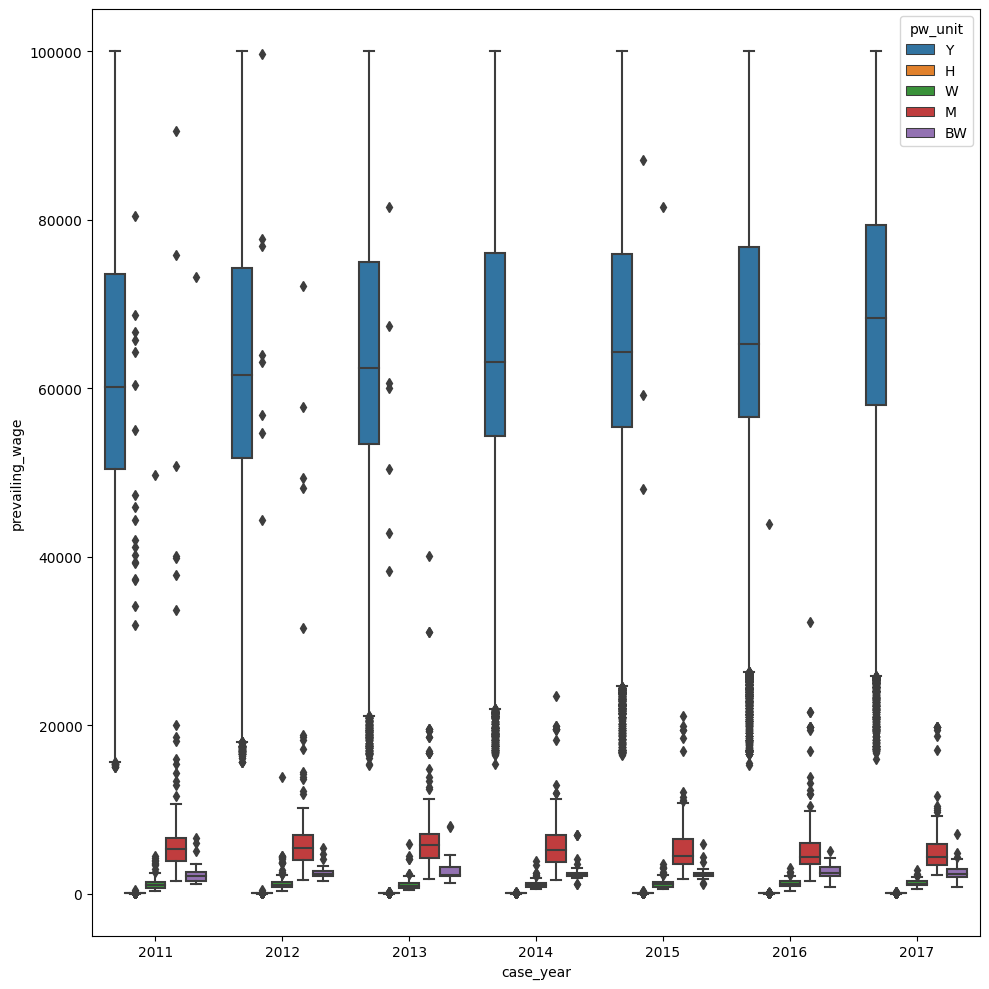

In [72]:
plt.figure(figsize=(10,10))
sns.boxplot(data=certified_cases, x='case_year', y='prevailing_wage',hue='pw_unit')
plt.tight_layout()

Q14. which job have high paying job benifecaries from 2011 to 2018?

(20000.0, 100000.0)

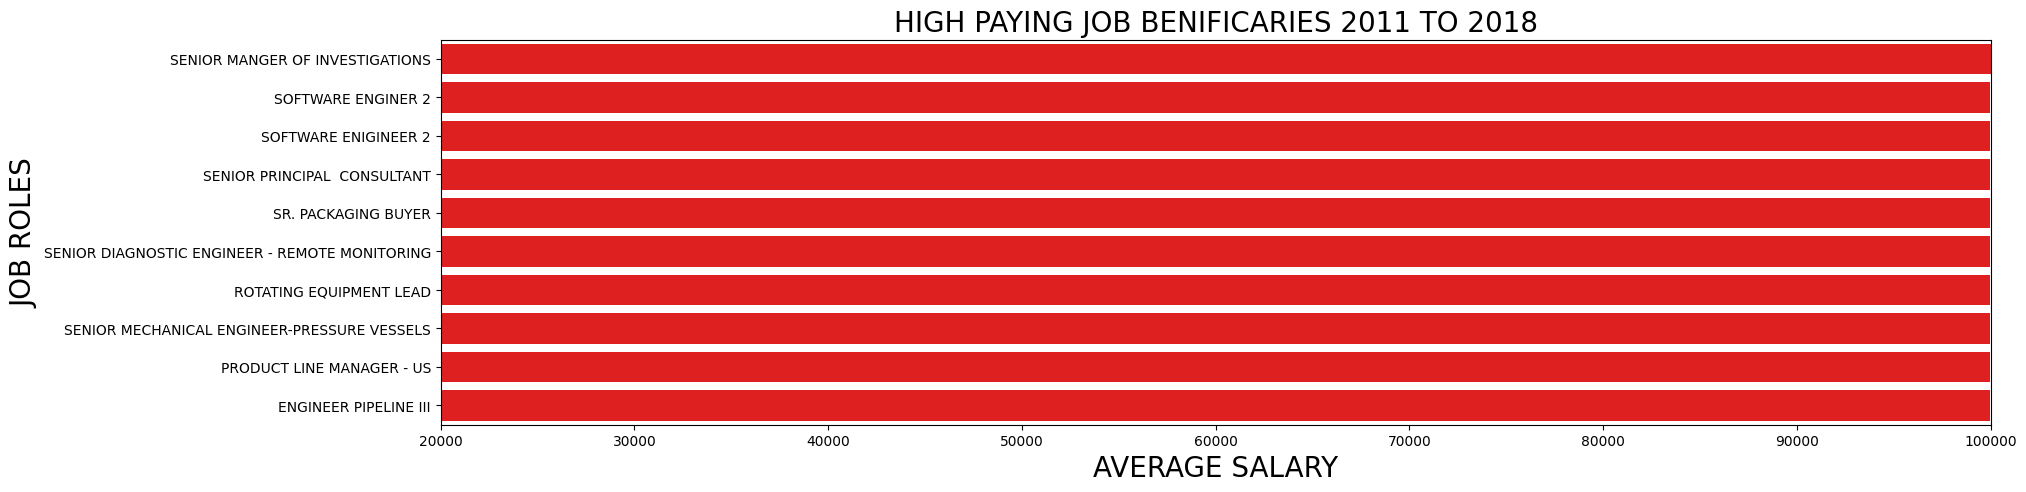

In [73]:
top_payers = certified_cases.groupby(by=['job_title'])['prevailing_wage'].mean()
top_payers = top_payers.sort_values(ascending=False)[0:10]
plt.figure(figsize=(20,5))
sns.barplot(y = top_payers.index ,x = top_payers.values ,color='red')
plt.xlabel('AVERAGE SALARY',size=20)
plt.ylabel('JOB ROLES', size=20)
plt.title('HIGH PAYING JOB BENIFICARIES 2011 TO 2018',size=20)
plt.xlim(plt.xlim((20000,100000)))


Q15. which are the top five employer company have the highest case status and in whcih year?

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3080\1535162484.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  emp_year.pivot('case_year','emp_name','case_status').plot.bar(width=0.7)


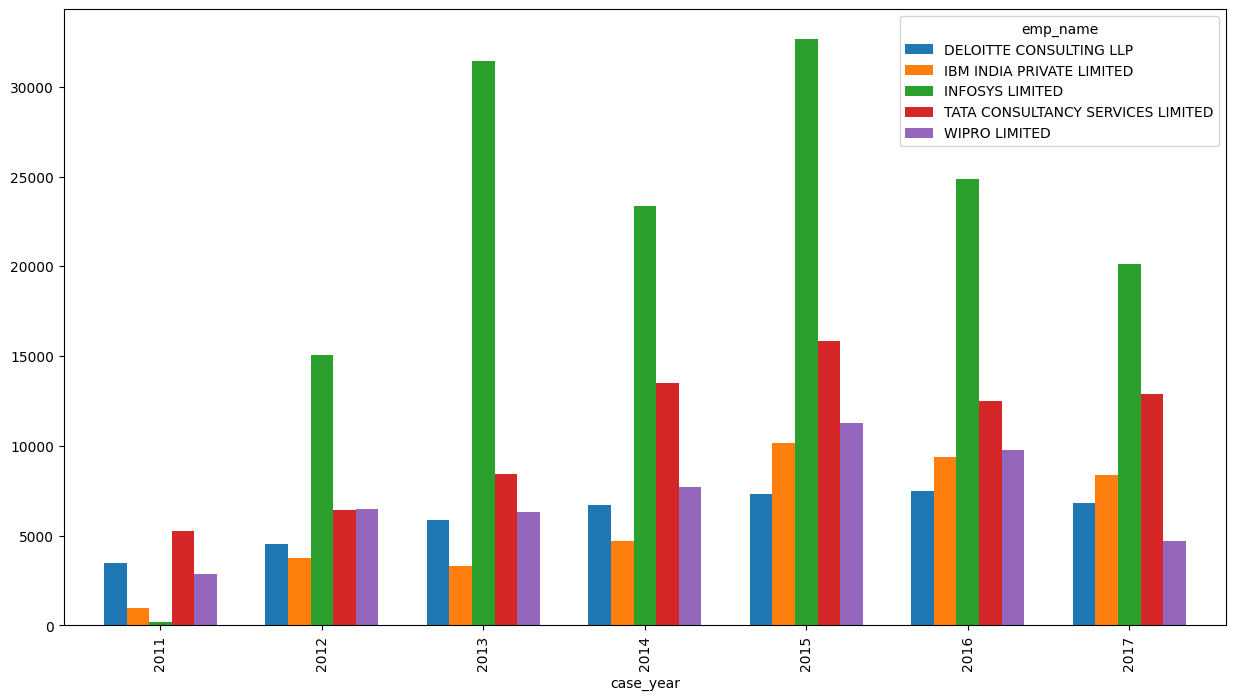

In [74]:
emp_year=df[df['emp_name'].isin(df['emp_name'].value_counts().sort_values(ascending=False)[:5].index)]
emp_year=emp_year.groupby(['emp_name','case_year'])['case_status'].count().reset_index()
emp_year.pivot('case_year','emp_name','case_status').plot.bar(width=0.7)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

Q16. What is the prevailing wage distribution using median to shows clear median wage distribution?

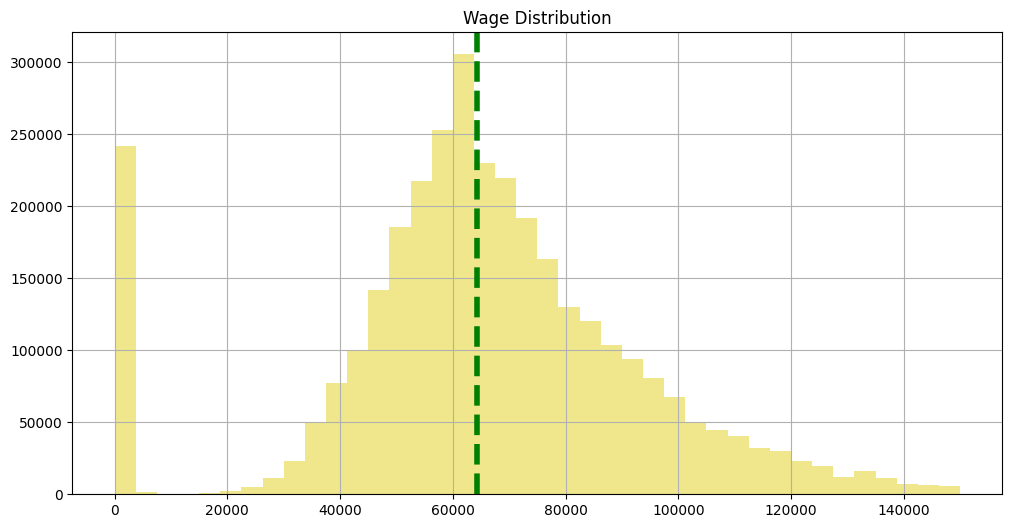

In [75]:
plt.figure(figsize=(12,6))
df[df['prevailing_wage']<150000].prevailing_wage.hist(bins=40,color='khaki')
plt.axvline(df[df['prevailing_wage']<=150000].prevailing_wage.median(), color='green', linestyle='dashed', linewidth=4)
plt.title('Wage Distribution')
plt.show()

Q18. A diagram shows the relationship between prevailing wages and if the status is Denied or Certified....

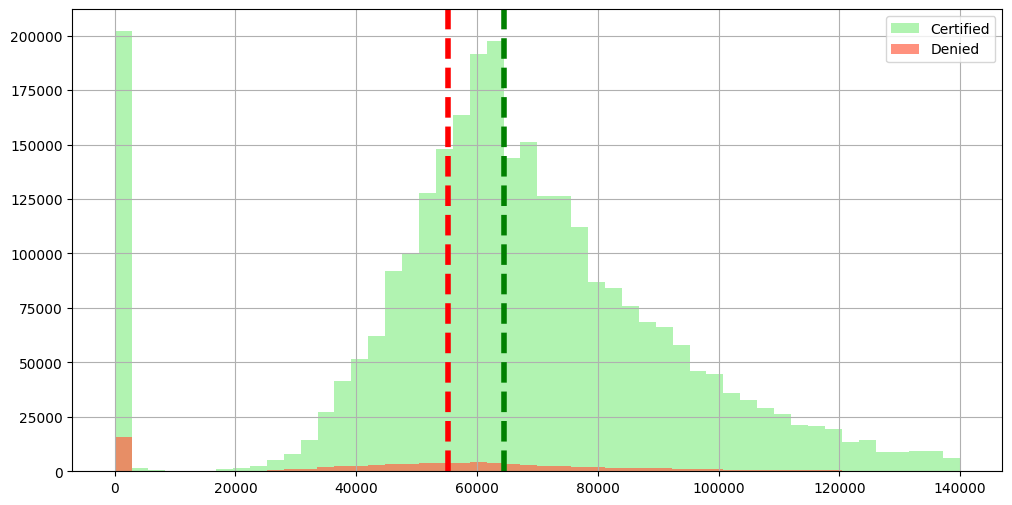

In [76]:
plt.figure(figsize=(12,6))
df[(df['prevailing_wage']<140000)&(df['case_status']=='C')].prevailing_wage.hist(bins=50, color="lightgreen", alpha=0.7, label='Certified')
plt.axvline(df[(df['prevailing_wage']<=140000)&(df['case_status']=='C')].prevailing_wage.median(), color='green', linestyle='dashed', linewidth=4)
df[(df['prevailing_wage']<140000)&(df['case_status']=='D')].prevailing_wage.hist(bins=50,color="tomato", alpha=0.7, label='Denied')
plt.axvline(df[(df['prevailing_wage']<=140000)&(df['case_status']=='D')].prevailing_wage.median(), color='red', linestyle='dashed', linewidth=4)
plt.legend()
plt.show()

Q19. Draw a diagram using subplots shows that how many Visa case is for data science jobs such as, Applications for Data Scientists, Applications for Data Analysts and Applications for Data Engneers?

In [77]:
data_peeps=df.dropna(subset=['job_title'])
data_peeps=data_peeps[data_peeps['job_title'].str.contains('DATA')]
data_scientists=data_peeps[data_peeps['job_title'].str.contains('DATA SCIENTIST')]
data_analyst=data_peeps[data_peeps['job_title'].str.contains('DATA ANALYST')]
data_eng=data_peeps[data_peeps['job_title'].str.contains('DATA ENG')]

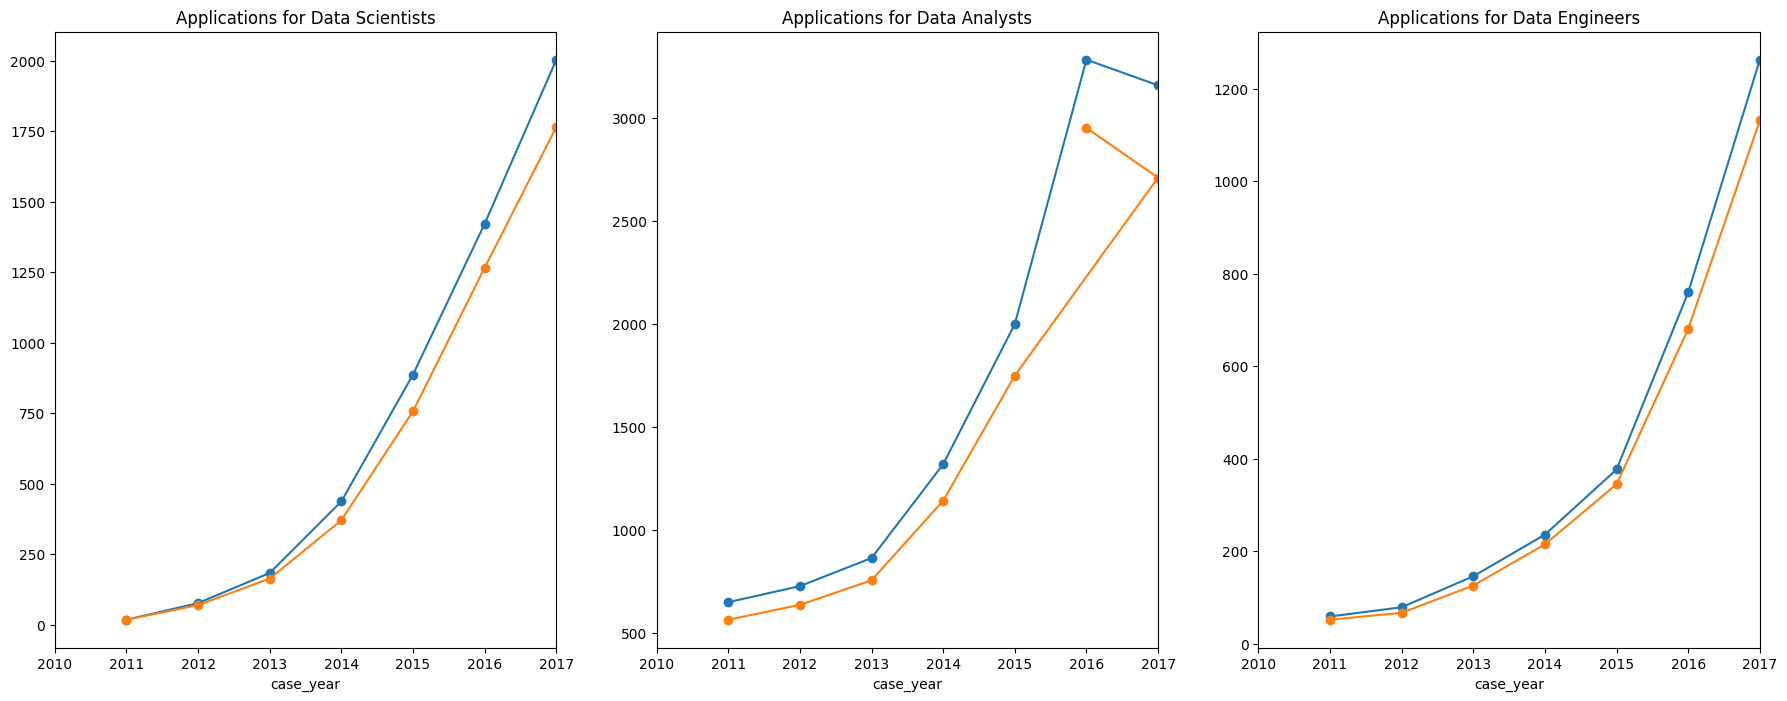

In [78]:
f,ax=plt.subplots(1,3,figsize=(22,8))
data_scientists.groupby('case_year')['case_status'].count().plot(ax=ax[0],marker='o')
data_analyst.groupby('case_year')['case_status'].count().plot(ax=ax[1],marker='o')
data_eng.groupby('case_year')['case_status'].count().plot(ax=ax[2],marker='o')
data_scientists[data_scientists['case_status']=='C'].case_year.value_counts().plot(marker='o',ax=ax[0])
data_analyst[data_analyst['case_status']=='C'].case_year.value_counts().plot(marker='o',ax=ax[1])
data_eng[data_eng['case_status']=='C'].case_year.value_counts().plot(marker='o',ax=ax[2])
for i,j in zip([0,1,2],['Applications for Data Scientists','Applications for Data Analysts','Applications for Data Engineers']):
    ax[i].set_title(j)
for i in [0,1,2]:
    ax[i].set_xlim([2010,2017])
plt.show()

Q20. which employer have highest paying employeers for Data Scientists in $ dollar?

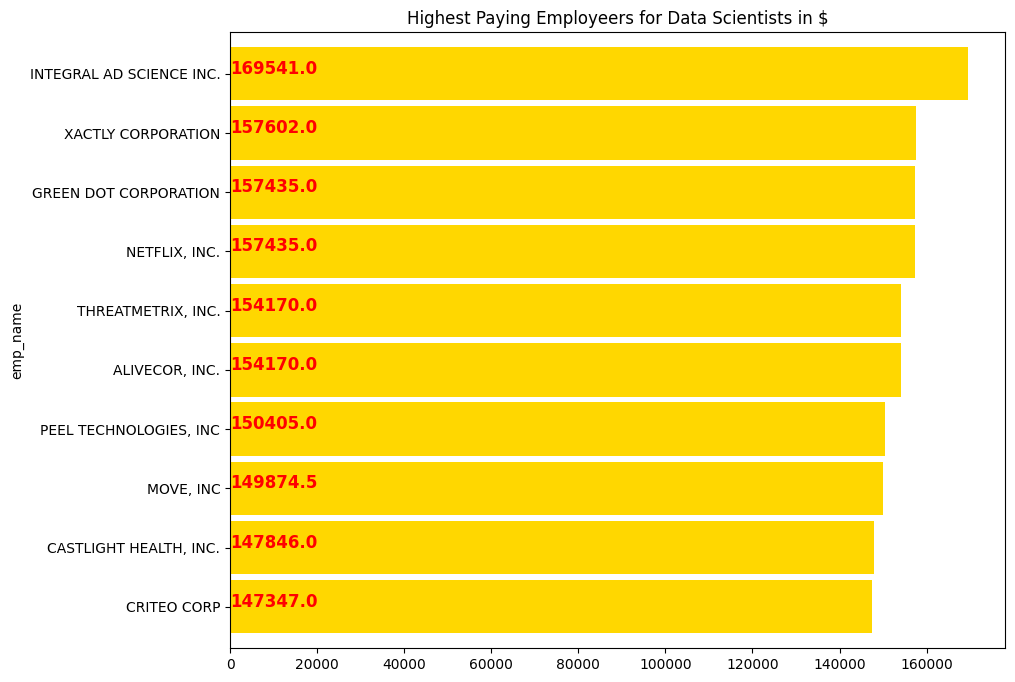

In [79]:
plt.figure(figsize=(10,8))
ax=data_scientists.groupby('emp_name')['prevailing_wage'].median().sort_values(ascending=False)[:10].plot.barh(width=0.9,color='#ffd700')
for i, v in enumerate(data_scientists.groupby('emp_name')['prevailing_wage'].median().sort_values(ascending=False)[:10].values): 
    ax.text(.8, i, v,fontsize=12,color='r',weight='bold')
plt.title('Highest Paying Employeers for Data Scientists in $')
fig=plt.gca()
fig.invert_yaxis()
plt.show()
plt.show()

Q21. Using folium map to shows location langtitude and latitude of employer state according to their prevailing wages?

In [82]:
import folium

sal_state=data_scientists.groupby(['lat','lng','emp_state'])['prevailing_wage'].median().sort_values(ascending=False).reset_index()
appli=df.groupby(['lat','lng']).count().reset_index()
locate=sal_state[['lat','lng']]
sal=sal_state['prevailing_wage']
state=sal_state['emp_state']
def color_producer(elevation):
    if elevation < 75000:
        return 'red'
    elif 75000 <= elevation < 100000:
        return 'orange'
    else:
        return 'green'
map1 = folium.Map(location=[39.50, -98.35],tiles='CartoDB dark_matter',zoom_start=3.5)
for point in sal_state.index:
    folium.CircleMarker(list(locate.loc[point]),popup='<b>Average Salary in $: </b>'+str(sal.loc[point])+"<br><b> State: "+str(state.loc[point]),radius=sal.loc[point]*0.0001,color=color_producer(sal.loc[point]),fill_color=color_producer(sal.loc[point]),fill=True).add_to(map1)
map1

Q22. Which firms (employers) submit the most petitions annually?

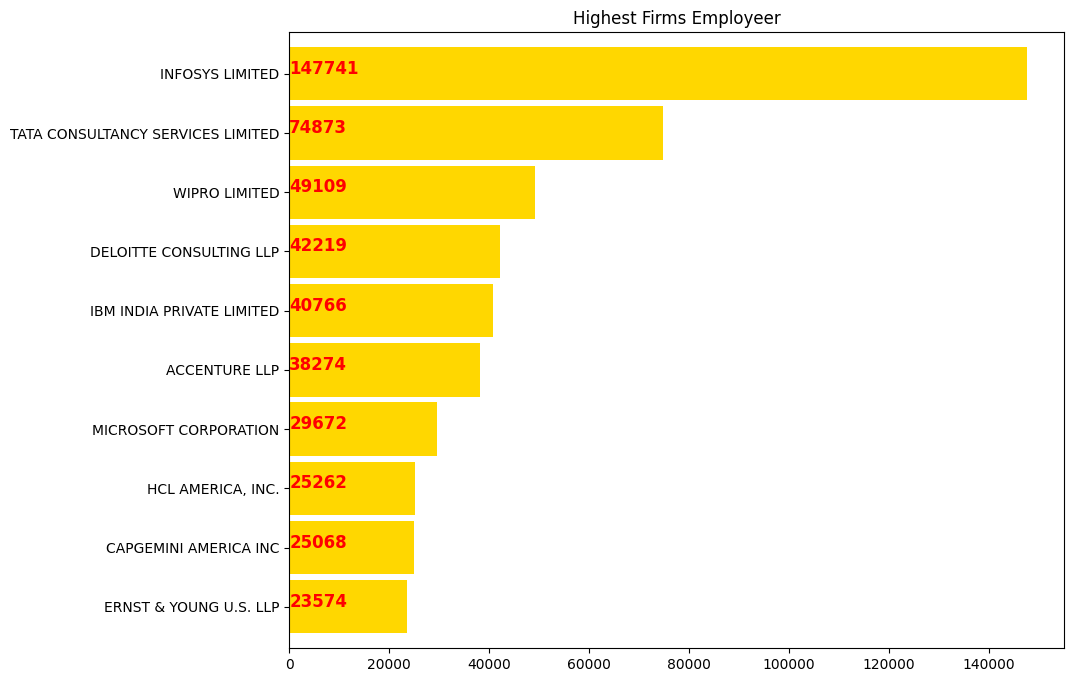

In [80]:
plt.figure(figsize=(10,8))
ax=df['emp_name'].value_counts().sort_values(ascending=False)[:10].plot.barh(width=0.9,color='#ffd700')
for i, v in enumerate(df['emp_name'].value_counts().sort_values(ascending=False).values[:10]): 
    ax.text(.8, i, v,fontsize=12,color='r',weight='bold')
plt.title('Highest Firms Employeer')
fig=plt.gca()
fig.invert_yaxis()
plt.show()

In [81]:
pip install folium

## Choose Sample

In [83]:
df.head()

case_year case_status case_submitted decision_date  \
0       2017           C     2017-02-06    2017-02-10   
1       2017           C     2017-03-21    2017-03-27   
2       2017           C     2017-03-17    2017-03-23   
3       2017           C     2017-03-10    2017-03-16   
4       2017           C     2017-08-04    2017-08-10   

                          emp_name     emp_city emp_state emp_zip  \
0         LAKELANDS NEPHROLOGY, PA    GREENWOOD        SC   29646   
1              UNIVERSITY OF IDAHO       MOSCOW        ID   83844   
2           XPO SUPPLY CHAIN, INC.   HIGH POINT        NC   27265   
3  C AND S WHOLESALE GROCERS, INC.        KEENE        NH   03431   
4                   SANFORD CLINIC  SIOUX FALLS        SD   57117   

                 job_title soc_code  prevailing_wage pw_unit  wage_from  \
0             NEPHROLOGIST  29-1063       187,200.00       Y 190,000.00   
1     POST DOCTORAL FELLOW  19-1013        39,957.00       Y  47,507.00   
2        OPERATION ANALYST  15-2031        59,966.00       Y  65,000.00   
3  SR. INDUSTRIAL ENGINEER  17-2112        78,832.00       Y  86,988.15   
4  HEMATOLOGIST/ONCOLOGIST  29-1069       169,645.00       Y 450,000.00   

  wage_unit  work_city work_state   lat     lng  
0         Y  ABBEVILLE         SC 34.18  -82.38  
1         Y   ABERDEEN         ID 42.94 -112.84  
2         Y   ABERDEEN         MD 39.51  -76.16  
3         Y   ABERDEEN         MD 39.51  -76.16  
4         Y   ABERDEEN         SD 45.46  -98.49

In [84]:
df.drop(['case_submitted', 'decision_date', 'emp_zip', 'soc_code', 'lat', 'lng','work_city','work_state','wage_unit','case_year','emp_name','emp_city'],axis=1,inplace=True)

Filter the 4 class

In [85]:
df.groupby('case_status').count()

emp_state  job_title  prevailing_wage  pw_unit  wage_from
case_status                                                           
C              2935633    2935633          2935633  2935633    2935633
CW              235866     235866           235866   235866     235866
D                87413      87413            87413    87413      87413
W               101089     101089           101089   101089     101089

In [86]:
sample_for_c=df[df['case_status']=='C']
sample_c=sample_for_c.sample(100000)

In [87]:
sample_for_cw=df[df['case_status']=='CW']
sample_cw=sample_for_cw.sample(100000)

In [88]:
sample_for_d=df[df['case_status']=='D']
sample_d=sample_for_d.sample(87413)

In [89]:
sample_for_w=df[df['case_status']=='W']
sample_w=sample_for_w.sample(101089)

### Sampling

In [90]:
sample_data=pd.concat([sample_c,sample_cw,sample_d,sample_w])

In [91]:
sample_data.head()

case_status emp_state           job_title  prevailing_wage pw_unit  \
207562            C        TX  PROGRAMMER ANALYST        63,274.00       Y   
1110680           C        MA   ACTUARIAL ANALYST        68,224.00       Y   
2439634           C        NJ   ARCHITECT LEVEL 2        71,323.00       Y   
2003887           C        FL  PROGRAMMER ANALYST        75,213.00       Y   
1051437           C        CA  MANAGEMENT ANALYST            27.54       H   

         wage_from  
207562   70,000.00  
1110680  68,600.00  
2439634  71,323.00  
2003887  83,845.00  
1051437      27.54

In [92]:
sample_data.groupby('case_status').count()

emp_state  job_title  prevailing_wage  pw_unit  wage_from
case_status                                                           
C               100000     100000           100000   100000     100000
CW              100000     100000           100000   100000     100000
D                87413      87413            87413    87413      87413
W               101089     101089           101089   101089     101089

### Split the Data into X and Y

In [93]:
x= sample_data.drop('case_status',axis=1)
y= sample_data['case_status']

In [94]:
x.head()

emp_state           job_title  prevailing_wage pw_unit  wage_from
207562         TX  PROGRAMMER ANALYST        63,274.00       Y  70,000.00
1110680        MA   ACTUARIAL ANALYST        68,224.00       Y  68,600.00
2439634        NJ   ARCHITECT LEVEL 2        71,323.00       Y  71,323.00
2003887        FL  PROGRAMMER ANALYST        75,213.00       Y  83,845.00
1051437        CA  MANAGEMENT ANALYST            27.54       H      27.54

In [95]:
y.head()

207562     C
1110680    C
2439634    C
2003887    C
1051437    C
Name: case_status, dtype: object

### Transfer Categorical Data into Numerical Data

Case status

In [96]:
casestatus = {'C':1 ,'CW':2, 'D':3 , 'W':4}


In [97]:
sample_data['case_status'] = sample_data['case_status'].map(casestatus)

pw_unit

In [98]:
prevailingwageunit={'Y': 1, 'H':2, 'W':3, 'BW':4, 'M':5}

In [99]:
sample_data['pw_unit'] = sample_data['pw_unit'].map(prevailingwageunit)

In [100]:
sample_data

case_status emp_state           job_title  prevailing_wage  pw_unit  \
207562             1        TX  PROGRAMMER ANALYST        63,274.00        1   
1110680            1        MA   ACTUARIAL ANALYST        68,224.00        1   
2439634            1        NJ   ARCHITECT LEVEL 2        71,323.00        1   
2003887            1        FL  PROGRAMMER ANALYST        75,213.00        1   
1051437            1        CA  MANAGEMENT ANALYST            27.54        2   
...              ...       ...                 ...              ...      ...   
1123774            4        TX        MANAGER JC50        64,667.00        1   
547187             4        CA    BUSINESS ANALYST        78,083.00        1   
1507885            4        NY   PROJECT ARCHITECT        55,411.00        1   
333151             4        NY           LAW CLERK            19.40        2   
1640229            4        NC      DATA ARCHITECT        66,061.00        1   

         wage_from  
207562   70,000.00  
1110680  68,600.00  
2439634  71,323.00  
2003887  83,845.00  
1051437      27.54  
...            ...  
1123774  64,667.00  
547187  113,760.00  
1507885  56,000.00  
333151       20.00  
1640229  77,273.00  

[388502 rows x 6 columns]

Binary encoder for the rest of categorical Data # because its includes large database

In [101]:
import category_encoders as ce

In [102]:
encoder= ce.BinaryEncoder(cols=['emp_state', 'job_title'],return_df=True)

In [103]:
data_encoded=encoder.fit_transform(sample_data) 
data_encoded

case_status  emp_state_0  emp_state_1  emp_state_2  emp_state_3  \
207562             1            0            0            0            0   
1110680            1            0            0            0            0   
2439634            1            0            0            0            0   
2003887            1            0            0            0            1   
1051437            1            0            0            0            1   
...              ...          ...          ...          ...          ...   
1123774            4            0            0            0            0   
547187             4            0            0            0            1   
1507885            4            0            0            0            1   
333151             4            0            0            0            1   
1640229            4            0            0            0            1   

         emp_state_4  emp_state_5  job_title_0  job_title_1  job_title_2  ...  \
207562             0            1            0            0            0  ...   
1110680            1            0            0            0            0  ...   
2439634            1            1            0            0            0  ...   
2003887            0            0            0            0            0  ...   
1051437            0            1            0            0            0  ...   
...              ...          ...          ...          ...          ...  ...   
1123774            0            1            0            0            0  ...   
547187             0            1            0            0            0  ...   
1507885            1            0            0            0            0  ...   
333151             1            0            0            0            0  ...   
1640229            1            1            0            0            0  ...   

         job_title_10  job_title_11  job_title_12  job_title_13  job_title_14  \
207562              0             0             0             0             0   
1110680             0             0             0             0             0   
2439634             0             0             0             0             0   
2003887             0             0             0             0             0   
1051437             0             0             0             0             1   
...               ...           ...           ...           ...           ...   
1123774             1             1             1             0             1   
547187              0             1             0             0             1   
1507885             1             1             1             0             1   
333151              1             1             1             0             1   
1640229             1             0             0             1             1   

         job_title_15  job_title_16  prevailing_wage  pw_unit  wage_from  
207562              0             1        63,274.00        1  70,000.00  
1110680             1             0        68,224.00        1  68,600.00  
2439634             1             1        71,323.00        1  71,323.00  
2003887             0             1        75,213.00        1  83,845.00  
1051437             0             0            27.54        2      27.54  
...               ...           ...              ...      ...        ...  
1123774             0             1        64,667.00        1  64,667.00  
547187              0             0        78,083.00        1 113,760.00  
1507885             0             0        55,411.00        1  56,000.00  
333151              0             0            19.40        2      20.00  
1640229             0             0        66,061.00        1  77,273.00  

[388502 rows x 27 columns]

### Split the new x and y (when all the data now is encoded)

In [104]:
x= data_encoded.drop('case_status',axis=1)
y= data_encoded['case_status']

### Split the Data into Train and Test 

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42,stratify=y)

### Scaling

In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

### Modeling Using different classification Models

Logistic Regression classification 

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_pred_lr = lr.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train,lr.predict(x_train)))
print('evaluation for testing \n',classification_report(y_test,y_pred_lr))

c:\Users\lenovo\Pictures\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lenovo\Pictures\New folder\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\lenovo\Pictures\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

evaluation for training 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00     80000
           2       0.00      0.00      0.00     80000
           3       0.80      0.01      0.01     69930
           4       0.26      1.00      0.41     80871

    accuracy                           0.26    310801
   macro avg       0.26      0.25      0.11    310801
weighted avg       0.25      0.26      0.11    310801

evaluation for testing 
               precision    recall  f1-score   support

           1       0.33      0.71      0.45     20000
           2       0.34      0.23      0.27     20000
           3       0.47      0.42      0.44     17483
           4       0.57      0.18      0.27     20218

    accuracy                           0.38     77701
   macro avg       0.43      0.38      0.36     77701
weighted avg       0.43      0.38      0.36     77701



c:\Users\lenovo\Pictures\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gaussian NB

In [109]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_scaled,y_train)
y_pred_nb = nb.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train,nb.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_nb))

evaluation for training 
               precision    recall  f1-score   support

           1       0.30      0.99      0.46     80000
           2       0.24      0.08      0.12     80000
           3       0.60      0.09      0.16     69930
           4       1.00      0.10      0.17     80871

    accuracy                           0.32    310801
   macro avg       0.54      0.32      0.23    310801
weighted avg       0.54      0.32      0.23    310801

evaluation for testing 
               precision    recall  f1-score   support

           1       0.30      0.99      0.46     20000
           2       0.25      0.09      0.13     20000
           3       0.61      0.10      0.17     17483
           4       1.00      0.09      0.17     20218

    accuracy                           0.32     77701
   macro avg       0.54      0.32      0.23     77701
weighted avg       0.54      0.32      0.23     77701



Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_scaled,y_train)
y_pred_rf = rf.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train,rf.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_rf))

evaluation for training 
               precision    recall  f1-score   support

           1       0.93      0.91      0.92     80000
           2       0.91      0.94      0.93     80000
           3       0.94      0.94      0.94     69930
           4       0.93      0.92      0.92     80871

    accuracy                           0.93    310801
   macro avg       0.93      0.93      0.93    310801
weighted avg       0.93      0.93      0.93    310801

evaluation for testing 
               precision    recall  f1-score   support

           1       0.49      0.52      0.50     20000
           2       0.57      0.59      0.58     20000
           3       0.61      0.60      0.60     17483
           4       0.53      0.48      0.51     20218

    accuracy                           0.55     77701
   macro avg       0.55      0.55      0.55     77701
weighted avg       0.55      0.55      0.54     77701



Decision Tree Classifier

In [111]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled,y_train)
y_pred_dt = dt.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train,dt.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_dt))

evaluation for training 
               precision    recall  f1-score   support

           1       0.90      0.95      0.92     80000
           2       0.92      0.94      0.93     80000
           3       0.95      0.94      0.94     69930
           4       0.96      0.89      0.92     80871

    accuracy                           0.93    310801
   macro avg       0.93      0.93      0.93    310801
weighted avg       0.93      0.93      0.93    310801

evaluation for testing 
               precision    recall  f1-score   support

           1       0.44      0.43      0.44     20000
           2       0.50      0.52      0.51     20000
           3       0.54      0.54      0.54     17483
           4       0.48      0.47      0.47     20218

    accuracy                           0.49     77701
   macro avg       0.49      0.49      0.49     77701
weighted avg       0.49      0.49      0.49     77701



### Cross Validation

In [112]:
from sklearn.model_selection import KFold,cross_validate
kfold = KFold(n_splits=10)
scores = cross_validate(rf,x_train_scaled,y_train,cv=kfold)
scores

{'fit_time': array([55.8669281 , 57.34056544, 56.05461931, 54.10665035, 59.32022047,
        54.08953977, 55.64745903, 54.67891431, 58.25724196, 80.71836019]),
 'score_time': array([1.93396306, 1.55868435, 1.43465066, 1.47804666, 1.55384564,
        1.52496362, 1.46028709, 1.44511795, 3.83457017, 1.45156813]),
 'test_score': array([0.53627618, 0.53803089, 0.53613256, 0.53484556, 0.53632561,
        0.53870656, 0.54115187, 0.53767696, 0.53741956, 0.53877091])}

In [113]:
scores['test_score'].mean()

0.5375336670650528

## Hyper Parameter Tuning

In [114]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[100,200,300],'max_depth':[4,7,5]}
grid_search = GridSearchCV(rf,param_grid=parameters,cv=5)
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 7, 5],
                         'n_estimators': [100, 200, 300]})

In [115]:
grid_search.best_params_

{'max_depth': 7, 'n_estimators': 200}

In [116]:
final_rf_model = RandomForestClassifier(n_estimators=100,max_depth= 3)
final_rf_model.fit(x_train_scaled,y_train)
y_pred_rf = final_rf_model.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train,final_rf_model.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_rf))

evaluation for training 
               precision    recall  f1-score   support

           1       0.33      0.80      0.47     80000
           2       0.47      0.19      0.27     80000
           3       0.47      0.48      0.47     69930
           4       1.00      0.14      0.24     80871

    accuracy                           0.40    310801
   macro avg       0.57      0.40      0.36    310801
weighted avg       0.57      0.40      0.36    310801

evaluation for testing 
               precision    recall  f1-score   support

           1       0.33      0.81      0.47     20000
           2       0.48      0.19      0.27     20000
           3       0.47      0.48      0.48     17483
           4       1.00      0.14      0.24     20218

    accuracy                           0.40     77701
   macro avg       0.57      0.41      0.36     77701
weighted avg       0.57      0.40      0.36     77701



### start pipline

In [117]:
sample_data.head()

case_status emp_state           job_title  prevailing_wage  pw_unit  \
207562             1        TX  PROGRAMMER ANALYST        63,274.00        1   
1110680            1        MA   ACTUARIAL ANALYST        68,224.00        1   
2439634            1        NJ   ARCHITECT LEVEL 2        71,323.00        1   
2003887            1        FL  PROGRAMMER ANALYST        75,213.00        1   
1051437            1        CA  MANAGEMENT ANALYST            27.54        2   

         wage_from  
207562   70,000.00  
1110680  68,600.00  
2439634  71,323.00  
2003887  83,845.00  
1051437      27.54

In [118]:
X= sample_data.drop('case_status',axis=1)
y =sample_data['case_status']

In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=9,stratify=y)

In [120]:
numeric_columns= x_train.select_dtypes(exclude='object').columns
numeric_columns

Index(['prevailing_wage', 'pw_unit', 'wage_from'], dtype='object')

In [121]:
cat_columns = x_train.select_dtypes(include='object').columns
cat_columns

Index(['emp_state', 'job_title'], dtype='object')

In [122]:
X['emp_state'].unique()

array(['TX', 'MA', 'NJ', 'FL', 'CA', 'NY', 'NC', 'WA', 'VA', 'NE', 'IL',
       'MD', 'PA', 'GA', 'OH', 'SD', 'TN', 'MO', 'MI', 'SC', 'DE', 'CT',
       'MN', 'AR', 'IA', 'MS', 'NV', 'WI', 'OK', 'OR', 'KY', 'AZ', 'NM',
       'RI', 'NH', 'LA', 'HI', 'WY', 'PR', 'KS', 'IN', 'UT', 'VT', 'DC',
       'ME', 'CO', 'ID', 'ND', 'WV', 'AL', 'MT', 'VI', 'AK', 'AS'],
      dtype=object)

In [123]:
X['job_title'].unique()

array(['PROGRAMMER ANALYST', 'ACTUARIAL ANALYST', 'ARCHITECT LEVEL 2',
       ..., 'ASSOICATE PRINCIPAL, CONSUMER OPERATIONS',
       'PROJECT ENGINEER COORDINATOR', 'MARKETING MANAGER - AMERICAS'],
      dtype=object)

In [124]:
for i in X['job_title'].unique(): 
    print(i)

PROGRAMMER ANALYST
ACTUARIAL ANALYST
ARCHITECT LEVEL 2
MANAGEMENT ANALYST
IT CONSULTANT
TESTING ENGINEERING ADVISOR
ABAP DEVELOPMENT COORDINATOR
SR. ENGINEER
COMPUTER PROGRAMMER
SOFTWARE DEVELOPMENT ENGINEER II
POWER ELECTRONICS ENGINEER
SOFTWARE ENGINEER
DATA WAREHOUSE ARCHITECT
SYSTEM ENGINEER
SYSTEMS ENGINEER - US
ASSOCIATE DEVELOPER 1
POWER ENGINEER
MANAGER, SUPPLY CHAIN OPTIMIZATION
ASSOCIATE, SOFTWARE ENGINEER
HARDWARE ENGINEER, MTS LEVEL 2
SOFTWARE ARCHITECT
SENIOR SOFTWARE DEVELOPER
IMPORT OPERATIONS MANAGER -- SOUTH AMERICA
COMPUTER SYSTEMS ANALYST 2
SOFTWARE DEVELOPER
SENIOR CONSULTANT
ONSHORE TECHNICAL LEAD
SYSTEMS ANALYST
SCIENTIST
SENIOR ASSOCIATE JC60 - GRAPHIC DESIGNERS
SALES ENGINEER
DEMANTRA ANALYST
LOGISTICS MANAGER
PROCESS ENGINEER
DEVELOPER
BUSINESS ANALYST
CLIENT SERVICE ANALYST
PRESIDENT AND CHIEF EXECUTIVE OFFICER
ADVISORY STAFF
BUSINESS SYSTEMS ANALYST
ENGINEER ANALYST
COMPUTER SYSTEMS ANALYST
SOFTWARE ENGINEER II
TEST ANALYST - II
SOFTWARE DEVELOP CONSULTANT
CO

In [152]:
for i in X['wage_from'].unique(): 
    print(i)

70000.0
68600.0
71323.0
83845.0
27.54
43.0
85609.0
74288.0
62000.0
45282.0
135000.0
105000.0
75000.0
90000.0
74568.0
61050.0
62588.0
76690.0
74494.0
60000.0
100000.0
120000.0
78707.2
79186.0
65000.0
150000.0
89378.0
69742.0
86000.0
65396.0
61957.0
27.25
88500.0
132612.0
59550.0
68000.0
64875.0
62500.0
68400.0
60029.0
300000.0
80000.0
78250.0
73000.0
64700.0
90646.0
54000.0
67350.0
50461.0
105700.0
63690.0
48000.0
69056.0
106500.0
78669.0
29.34
73500.0
120012.0
95000.0
65767.0
120349.0
69222.0
65500.0
57000.0
69100.0
86320.0
99008.0
71964.0
131350.0
82500.0
74000.0
116000.0
88531.0
46550.0
98322.0
71781.0
110000.0
120250.0
65208.0
62800.0
63170.0
174313.0
122803.0
95601.0
72000.0
71000.0
23.73
112000.0
74635.0
55245.0
60500.0
20.33
17.9
87000.0
125561.0
30.0
95332.0
55000.0
51742.0
50400.0
43860.0
90168.0
69500.0
72613.0
62005.0
61800.0
79498.0
99300.0
123392.0
118100.0
80137.0
88234.0
119995.29
107000.0
85891.0
101500.08
67813.0
115000.0
84374.06
68827.0
59.0
74381.0
91000.0
112200.0
7

In [125]:
X['pw_unit'].unique()

array([1, 2, 5, 3, 4], dtype=int64)

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
numerical_pipline = Pipeline(steps=[('handle missing value',SimpleImputer(strategy='median')),
                                   ('scaling',StandardScaler(with_mean=False))])

In [127]:
cat_pipline = Pipeline(steps=[('handle missing value',SimpleImputer(strategy='most_frequent')),
                             ('one hot encoder',OneHotEncoder(drop='first', handle_unknown ='ignore')),
                             ('scaling',StandardScaler(with_mean=False))])

In [128]:
from sklearn.compose import ColumnTransformer
preprocess=ColumnTransformer(transformers=[('num',numerical_pipline, numeric_columns),
                                           ('cat',cat_pipline, cat_columns)], remainder='passthrough')

In [129]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(transformers=[('numerical_columns',numerical_pipline,numeric_columns),
                                               ('cat_columns',cat_pipline,cat_columns)])
preprocessing

ColumnTransformer(transformers=[('numerical_columns',
                                 Pipeline(steps=[('handle missing value',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['prevailing_wage', 'pw_unit', 'wage_from'], dtype='object')),
                                ('cat_columns',
                                 Pipeline(steps=[('handle missing value',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one hot encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore')),
                                                 ('scaling',
                         

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
final_pipeline = Pipeline(steps=[('preprocessing',preprocessing),
                                ('modeling',RandomForestClassifier(n_estimators=100,max_depth= 7))])
final_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_columns',
                                                  Pipeline(steps=[('handle '
                                                                   'missing '
                                                                   'value',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['prevailing_wage', 'pw_unit', 'wage_from'], dtype='object')),
                                                 ('cat_columns',
                                                  Pipeline(steps=[('handle '
                                                                   'missing '
                                          

In [132]:
x_train

emp_state                            job_title  prevailing_wage  \
2596678        TX  SOFTWARE QUALITY ASSURANCE ENGINEER        67,517.00   
2291504        NC                APPLICATION DEVELOPER        71,157.00   
2348815        NJ                   PROGRAMMER ANALYST        53,914.00   
111885         NJ                              CHEMIST        66,997.00   
2293143        MA        REGULATORY COMPLIANCE OFFICER        84,594.00   
...           ...                                  ...              ...   
3345130        FL                      SYSTEMS ANALYST            22.33   
2693875        NY                    PRESCHOOL TEACHER        35,235.00   
2917702        NJ          COMPUTER PROGRAMMER ANALYST        52,770.00   
755959         MI                   SOFTWARE DEVELOPER        52,104.00   
2915102        PA    DENTAL CERAMIST/DENTAL TECHNICIAN        39,603.00   

         pw_unit  wage_from  
2596678        1  74,400.00  
2291504        1  71,157.00  
2348815        1  53,914.00  
111885         1  66,997.00  
2293143        1  84,594.00  
...          ...        ...  
3345130        2      22.33  
2693875        1  38,220.00  
2917702        1  52,800.00  
755959         1  60,000.00  
2915102        1  48,000.00  

[310801 rows x 5 columns]

In [133]:
final_pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_columns',
                                                  Pipeline(steps=[('handle '
                                                                   'missing '
                                                                   'value',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['prevailing_wage', 'pw_unit', 'wage_from'], dtype='object')),
                                                 ('cat_columns',
                                                  Pipeline(steps=[('handle '
                                                                   'missing '
                                          

In [134]:
y_pred_final = final_pipeline.predict(x_test)

c:\Users\lenovo\Pictures\New folder\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [135]:
y_pred_final

array([4, 1, 4, ..., 4, 4, 2], dtype=int64)

In [137]:
import joblib
joblib.dump(final_pipeline,'H1Bvisa.pkl')

['H1Bvisa.pkl']

In [170]:
classifier.predict(pd.DataFrame({'emp_state':['TX'],'job_title':['PROGRAMMER ANALYST'],'prevailing_wage':['3000'],'pw_unit':['1'],'wage_from':['4000']}))

array([4], dtype=int64)

In [173]:
classifier = joblib.load('H1Bvisa.pkl')

In [136]:
! pip install streamlit

     ---------------------------------------- 9.6/9.6 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 20.6/20.6 MB 3.0 MB/s eta 0:00:00
     -------------------------------------- 164.8/164.8 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 813.6/813.6 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 184.3/184.3 kB 1.9 MB/s eta 0:00:00
     -------------------------------------- 904.2/904.2 kB 2.5 MB/s eta 0:00:00
     -------------------------------------- 238.7/238.7 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 3.2 MB/s eta 0:00:00
     -------------------------------------- 62.7/62.7 kB 846.7 kB/s eta 0:00:00
     -------------------------------------- 84.5/84.5 kB 526.4 kB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 2.4 MB/s eta 0:00:00
  Created wheel for va

### Streamlit

In [186]:
%%writefile H1Bvisa.py
import numpy as np
import pandas as pd
import joblib 
import streamlit as st

classifier = joblib.load('H1Bvisa.pkl')

def predict_visa_acceptence(emp_state,job_title,prevailing_wage,pw_unit,wage_from):
    prediction = classifier.predict(pd.DataFrame({'emp_state':[emp_state],'job_title':[job_title],'prevailing_wage':[prevailing_wage],'pw_unit':[pw_unit],'wage_from':[wage_from]}))

    label = ['C','D','W','CW']
    return label[prediction[0]-1]
    
    
    



def main():
    st.title('H-1B Visa prediction')
    html_temp="""
                <div style="background-color:red">
                <h2 style="color:white;text-align:center;">this is my first streamlit application </h2>
                </div>
              """
    st.markdown(html_temp,unsafe_allow_html=True)
    emp_state = st.selectbox('choose the employer state that provide the request job',[' GA', ' CA', ' NY', ' TX', ' PA',
       ' VA', ' NJ', ' MI', ' IL', ' MD', ' MO', ' WA', ' FI',
       ' NC', ' CT', ' MA', ' WI', ' MN', ' TN', ' LA', ' AR',
       ' MS', ' AL', ' IN','CO', 'AZ','OH','DC','VT','SD','ID','UT','RI','WV','PR','KS','NH','MT','KY','OR','IA','DE','NM','ND','NV','SC','NE','OK','VI','HI','ME','AK','WY','AS'])
    
    job_title= st.selectbox  ('choose the job title',['LEAD SPECIALIST SAP MAINTENANCE','PROGRAMMER ANALYST','APPLICATION SERVICES & QUALITY ASSURANCE ASSOCIATE',
    'COMPUTER SYSTEMS ENGINEER','ADVERTISING INVENTORY AND ANALYTICS SPECIALIST','CURAM DEVELOPER','ASSISTANT DIRECTOR OF INVESTOR RELATIONS','BUSINESS ANALYST',
    'COMPUTER PROGRAMMER AND ANALYST','FRONT-END JAVA DEVELOPER','SENIOR SOFTWARE ENGINEER','ASSOCIATE ANALYST, INTERNATIONAL MARKETS','DEVELOPER USER INTERFACE',
    'SENIOR MECHANICAL ENGINEER','CHARTERING BROKER','LOCALIZATION PROJECT MANAGER','SAP CONSULTANT','INFRASTRUCTURE PLANNING ENGINEER', 'SENIOR PROGRAMMER ANALYST',
    'PROJECT MANAGER','ONSITE TECHNICAL LEAD','OBD SYSTEMS AND TEST ENGINEER','RESEARCH PROJECT MANAGER','SOFTWARE DEVELOPER','SOFTWARE ENGINEER','SYSTEM ANALYST,BUSINESS',
    'SENIOR SERVER SIDE ENGINEER','WAREHOUSE MANAGEMENT SYSTEM SUPER USER','SENIOR INSTRUCTOR IN ANESTHESIOLOGY'])
    prevailing_wage= st.slider("Select the prevailing wage, usual benefits and overtime, paid to the majority of workers : ", min_value=20000,   
                       max_value=100000, value=1, step=1)
    pw_unit= st.selectbox('choose the prevailing unit type: Yearly, Hourly, Weekly, Monthly or Biweekly',['1', '2', '3','4','5'])

    wage_from= st.slider("Select the required wage:",min_value=400,max_value=1000, value=1, step=1)

    result = ""
    if st.button('predict'):
        result = predict_visa_acceptence(emp_state,job_title,prevailing_wage,pw_unit,wage_from)
    st.success('the Visa acceptance predicion is {} could be either Certified,Denied,Withdrwan,Certified Withdrawn'.format(result))  



         

    

    
        
if __name__=='__main__':
    main()


Overwriting H1Bvisa.py


In [187]:
! streamlit run H1Bvisa.py

^C
